# Latar Belakang
Airbnb adalah sebuah perusahaan asal Amerika yang menawarkan jasa aplikasi penghubung antara pemilik properti/host (berupa tempat tinggal seperti rumah, apartemen, dan sejenisnya) dan pencari tempat tinggal sementara/guest (biasanya dalam rangka liburan), sehingga dapat terjadi transaksi penyewaan properti antara host dan guest. Airbnb mendapat keuntungan dengan mengambil fee (baik dari host maupun guest) dari penggunaan aplikasi dan transaksi penyewaan yang terjadi.

Sebagai perusahaan yang bergerak di bidang jasa, Airbnb harus mampu memprediksi dan mengakomodasi kebutuhan/demand dari konsumen untuk memaksimalkan profit yang didapatkan. Demand dari konsumen berbeda-beda berdasarkan berbagai berbagai faktor seperti wilayah, suku, budaya, kebiasaan, dan sebagainya. Salah satu contoh yang paling mudah terlihat adalah perbedaan demand akan makanan pokok antara orang Asia dan Eropa. Memang orang Asia dan Eropa sama-sama membutuhkan makanan pokok, tetapi makanan pokok orang Asia dan Eropa berbeda jenisnya. Orang Asia cenderung mengonsumsi nasi sebagai makanan pokok, dan orang Eropa cenderung mengonsumsi roti sebagai makanan pokok. Sama halnya dalam kasus bisnis Airbnb, demand konsumen akan kriteria tempat tinggal sementara dapat berbeda-beda untuk setiap lokasi (bisa negara, kota, dan sebagainya). Oleh karena itu, perlu dilakukannya riset untuk mengetahui kriteria properti host yang banyak dicari oleh guest. Dalam kasus ini, akan dilakukan riset yang berfokus pada Airbnb di daerah Bangkok, Thailand.



## Pernyataan Masalah
Stakeholder: Divisi R&D Airbnb, konsumen Airbnb (terutama host), investor Airbnb

Perusahaan ingin mengetahui **kriteria tempat tinggal sementara di Bangkok seperti apa yang disukai oleh guest**. Informasi ini akan membantu perusahaan (terutama tim R&D) untuk merencanakan pengembangan untuk host di Bangkok kedepannya (seperti mengutamakan host yang memiliki kriteria properti seperti yang diinginkan guest), meningkatkan kepuasaan dan loyalitas konsumen karena perusahaan mampu mengakomodasi demand sebagian besar konsumen/guest, sehingga dapat meningkatkan profit perusahaan dalam jangka waktu ke depan dan memuaskan investor-investor yang ada.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Karakteristik properti host (listing) seperti apa yang disukai oleh guest, khususnya di daerah Bangkok, Thailand?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF).

In [1]:
from google.colab import files
upload = files.upload()

Saving Airbnb Listings Bangkok.csv to Airbnb Listings Bangkok.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')

Dataset ini berisi informasi mengenai karakteristik properti host, lokasi, jumlah review, ketersediaan, dan sebagainya. Terdapat 15 kolom di dalam dataset yang akan digunakan, antara lain:

* id: kode unik untuk setiap listing yang terdaftar di Airbnb
* name: nama dari listing
* host_id: kode unik untuk host
* host_name: nama host (biasanya nama pertama/nama depan)
* neighborhood: lokasi listing (sesuai informasi latitude dan longitude)
* latitude: informasi lokasi di peta
* longitude: informasi lokasi di peta
* room_type: tipe tempat tinggal yang ditawarkan (Private Room, Entire home/apt, Hotel room, Shared Room)
* price: harga dari listing
* minimum_nights: jumlah hari minimal untuk menyewa listing
* number_of_reviews: jumlah review yang dimiliki listing
* last_review: tanggal dari review terbaru yang masuk
* calculated_host_listings_count: jumlah listing yang dimiliki host di suatu lokasi pada aplikasi Mybnb
* availability_365: Ketersediaan dari listing x hari kedepan
* number_of_reviews_ltm: Jumlah review yang dimiliki listing dalam 12 bulan terakhir



In [3]:
# Menampilkan 5 data teratas dan terbawah dari dataset
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [4]:
# Menghapus kolom 'Unnamed: 0' dan 'reviews_per_month' karena tidak diperlukan ('Unnamed:0' merupakan kolom baris excel, sama dengan index)
df.drop(['Unnamed: 0', 'reviews_per_month'], axis=1, inplace= True)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,3,365,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset hr_analytics.

In [6]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
print('')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     1006

In [7]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [8]:
pd.set_option('display.max_colwidth', -1)
# Data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

Secara umum, kita bisa melihat bahwa:
* Dataset memiliki 15 kolom dan 15.854 baris
* Kolom `name` dan kolom `last_review` memiliki data kosong
* Kolom `price` memiliki 1 data yang bernilai 0. Diasumsikan akibat kesalahan input.
* Data kosong pada name kemungkinan akibat kelalaian input data
* Data kosong pada last_review adalah karena listing memang belum pernah mendapat review (number_of_reviews = 0)
* Lokasi listing (neighbourhood) berada di 50 tempat yang berbeda di Bangkok
* Jumlah listing yang dimiliki Host yang sama di daerah Bangkok beragam jumlahnya mulai dari 1 sampai 228

In [9]:
# Data yang memiliki nilai kosong pada 'name'
df_noname = df[df['name'].isna() == True]
df_noname[['name', 'host_name', 'number_of_reviews']]

,name,host_name,number_of_reviews
439,NaN,Titawan,0
544,NaN,Cherry,0
572,NaN,Parichart,0
669,NaN,Chira,0
1030,NaN,Nantida,0
1282,NaN,Diamond Bangkok,6
1594,NaN,Khaneungnit,0
2075,NaN,Pakaphol,2


Walaupun memiliki nama yang kosong, listing milik Diamond Bangkok dan Pakaphol pernah disewakan pada guest (`number_of_reviews` != 0). Hal tersebut menandakan bahwa nama yang kosong kemungkinan merupakan kesalahan sistem dalam melakukan pencatatan atau tidak wajib mendaftarkan nama listing saat mendaftar di aplikasi Mybnb. Oleh karena itu, nama yang kosong dapat ditolerir.

In [10]:
# Hubungan number_of_reviews dan last_review
df[df['number_of_reviews'] != 0][['number_of_reviews', 'last_review']]

,number_of_reviews,last_review
0,65,2020-01-06
3,2,2022-04-01
5,19,2017-08-03
6,1,2014-02-03
8,10,2016-03-29
...,...,...
15712,1,2022-12-25
15728,1,2022-12-26
15743,3,2022-12-24
15744,3,2022-12-28


In [11]:
# Hubungan number_of_reviews dan last_review
df[df['number_of_reviews'] == 0][['number_of_reviews', 'last_review']]

,number_of_reviews,last_review
1,0,NaN
2,0,NaN
4,0,NaN
7,0,NaN
14,0,NaN
...,...,...
15849,0,NaN
15850,0,NaN
15851,0,NaN
15852,0,NaN


Dapat dilihat bahwa nilai kosong pada kolom `last_review` berhubungan dengan nilai pada kolom `number_of_reviews`. Apabila nilai `number_of_reviews` = 0, maka nilai `last_review` akan kosong karena memang tidak memiliki data.

In [12]:
# Nilai 0 pada price
df[df['price'] == 0][['name', 'host_name', 'price', 'calculated_host_listings_count', 'number_of_reviews']]

,name,host_name,price,calculated_host_listings_count,number_of_reviews
11103,Somerset Maison Asoke Bangkok,Somerset Maison Asoke,0,1,0


Terdapat 1 baris data yang memiliki nilai `price` = 0. Karena tidak pernah disewa (`number_of_reviews` = 0) dan merupakan listing satu-satunya dari host (`calculated_host_listings_count` = 1), kemungkinan akibat input data yang belum lengkap dari host.

### Missing Value

In [13]:
# Jumlah missing value pada data di setiap kolom
df.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [14]:
# Persentase missing value di setiap kolom
df.isna().sum()/df.shape[0]*100

id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.000000 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

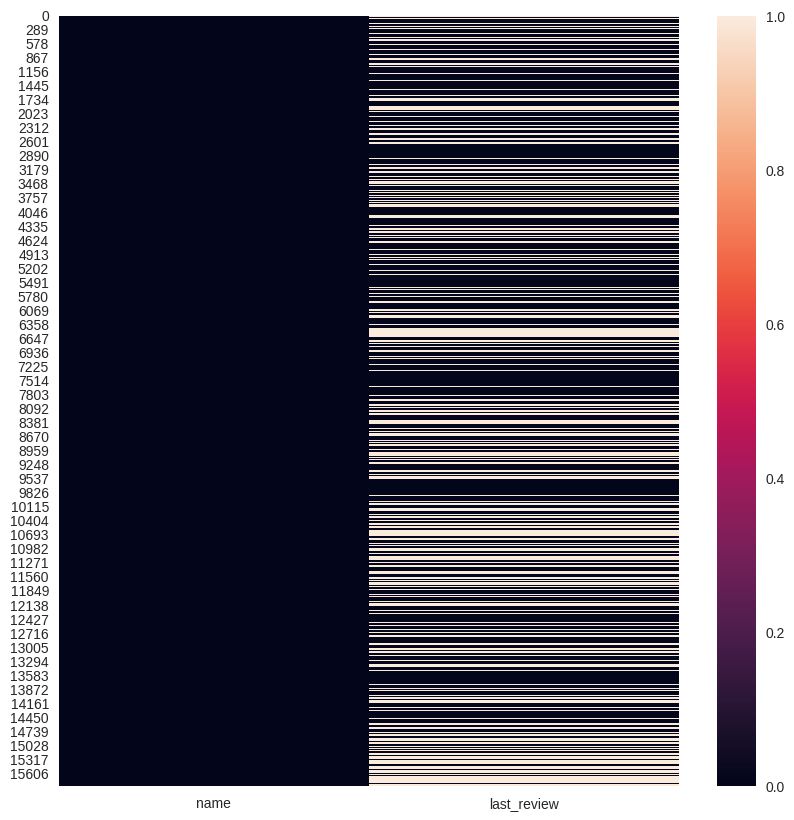

In [15]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','last_review']].isna())

Secara garis besar:  
* *missing value* di kolom `name` memiliki proporsi yang sangat kecil (0.050460)
* *missing value* di kolom `last_review` memiliki proporsi yang sangat tinggi (36.520752)
* *missing value* di kolom `last_review` berkaitan dengan kolom `number_of_reviews`. Jika data di `number_of_reviews` bernilai 0 (tidak ada review), maka  data di `last_review` akan kosong.  

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini umumnya tidak disarankan apabila jumlah missing value tergolong cukup tinggi (dalam kasus ini mencapai kurang lebih 36% dari data).

* Kedua, mengisi data yang hilang. Cara ini pada umumnya lebih disarankan karena tidak mengurangi jumlah data. Cara ini dapat digunakan untuk kolom `name` yang kosong karena nama yang kosong diasumsikan sebagai kesalahan input yang dapat ditolerir. kolom `last_review` juga akan diisikan nilai yang menunjukkan tidak adanya data (bukan NaN).



Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

#### `name` dan `last_review`
Mengubah data kosong di kolom `name` menjadi 'No Name' dan data kosong di kolom `last_review` menjadi '-'

In [16]:
df['name'].fillna('No Name', inplace = True)
df[df['name'] == 'No Name']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,No Name,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,1,365,0
544,4720818,No Name,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,1,365,0
572,4245018,No Name,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,1,365,0
669,6148415,No Name,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,1,365,0
1030,8055144,No Name,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,1,365,0
1282,10000742,No Name,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,1,365,0
1594,10710165,No Name,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,1,365,0
2075,13142743,No Name,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,3,220,0


In [17]:
df['last_review'].fillna('-', inplace = True)
df[df['last_review'] == '-'][['number_of_reviews', 'last_review']]

,number_of_reviews,last_review
1,0,-
2,0,-
4,0,-
7,0,-
14,0,-
...,...,...
15849,0,-
15850,0,-
15851,0,-
15852,0,-


In [18]:
# Mengecek kembali jumlah nilai kosong
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Dapat dilihat bahwa sudah tidak ada nilai kosong pada data

In [19]:
# Mengecek duplikasi dalam data
df.duplicated().value_counts()

False    15854
dtype: int64

Dapat dilihat bahwa data tidak memiliki nilai duplikat

#### `id`, `host_id`, dan data kosong pada `price`
kolom `id` dan `host_id` hanya merupakan kode unik untuk setiap listing dan host, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
Data `price` yang berisi nilai 0 dapat langsung dihapus saja karena hanya 1 baris saja.


In [20]:
df.drop(columns=['id','host_id'],inplace=True)

In [21]:
df.drop(11103, inplace = True)

In [22]:
# Reset index setelah drop baris
df.set_index('name', inplace = True)
df.reset_index(inplace = True)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [23]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15853, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,14794,"[The cosy river ( Family Deluxe room), In The Heart Of Sukhumvit Next To Mall, MRT & BTS]"
1,host_name,object,0,5312,"[Guide Duangruetai, Jerayut]"
2,neighbourhood,object,0,50,"[Khlong Sam Wa, Bang Rak]"
3,latitude,float64,0,9606,"[13.74459, 13.68404]"
4,longitude,float64,0,10224,"[100.54934, 100.49313]"
5,room_type,object,0,4,"[Shared room, Entire home/apt]"
6,price,int64,0,3039,"[1062, 2002]"
7,minimum_nights,int64,0,86,"[358, 120]"
8,number_of_reviews,int64,0,298,"[278, 84]"
9,last_review,object,0,1670,"[2022-09-19, 2016-09-07]"


Sebelum dibersihkan, data memiliki 15 kolom dan 15854 baris dengan 6 nilai kosong pada kolom `name` dan 5790 nilai kosong pada kolom `last_review`, serta 1 nilai 0 pada kolom `price`.

Setelah dibersihkan, jumlah baris berkurang 1 menjadi 15853 dan jumlah kolom menjadi 13 (menghilangkan kolom `id` dan `host_id`). Nilai kosong dan duplikat juga sudah tidak ada pada data

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik properti host (listing) yang disukai oleh guest**.  

Analisis akan dilakukan dengan membandingkan data jumlah review (`number_of_reviews` dan `number_of_reviews_ltm`) dengan fitur-fitur yang tersedia. Diasumsikan bahwa semakin banyak jumlah review dari guest, maka semakin populer suatu properti host (listing) yang bersangkutan. Data `last_review` juga dapat digunakan untuk mengetahui kapan terakhir kali suatu listing disewa oleh guest.



In [24]:
df.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,-,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,-,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,-,3,365,0


## Berdasarkan Lokasi Listing

Pertama, mari kita lihat bagaimana pengaruh lokasi listing (`neighborhood`) terhadap popularitas yang ditunjukkan oleh `number_of_reviews` dan `number_of_reviews_ltm`. Kita akan melakukan analisis dengan menjawab pertanyaan:

* Lokasi mana yang memiliki popularitas paling tinggi (ditunjukan dengan jumlah review yang paling tinggi)?
* Mengapa lokasi-lokasi tersebut populer dipilih oleh guest?
* Apakah terdapat perbedaan lokasi populer dalam 12 bulan terakhir?

In [25]:
# Menampilkan 10 lokasi yang memiliki jumlah review terbanyak
df_lokasi_sum = df.groupby('neighbourhood')[['number_of_reviews']].sum().reset_index()
df_lokasi_sum.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
top_10_sum = df_lokasi_sum.head(10)
top_10_sum.set_index('neighbourhood', inplace = True)
top_10_sum.reset_index(inplace = True)
top_10_sum

,neighbourhood,number_of_reviews
0,Khlong Toei,41281
1,Vadhana,37415
2,Sathon,22242
3,Ratchathewi,20698
4,Huai Khwang,18145
5,Bang Rak,17654
6,Phaya Thai,13659
7,Parthum Wan,9103
8,Chatu Chak,8218
9,Phra Nakhon,8142


In [26]:
# Menampilkan 10 lokasi yang memiliki jumlah review dalam 12 bulan terakhir terbanyak
df_lokasi_sum1 = df.groupby('neighbourhood')[['number_of_reviews_ltm']].sum().reset_index()
df_lokasi_sum1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
top_10_sum1 = df_lokasi_sum1.head(10)
top_10_sum1.set_index('neighbourhood', inplace = True)
top_10_sum1.reset_index(inplace = True)
top_10_sum1

,neighbourhood,number_of_reviews_ltm
0,Khlong Toei,13601
1,Vadhana,9709
2,Ratchathewi,4455
3,Bang Rak,3420
4,Sathon,3232
5,Huai Khwang,2557
6,Phaya Thai,2059
7,Phra Nakhon,1799
8,Din Daeng,1756
9,Parthum Wan,1670


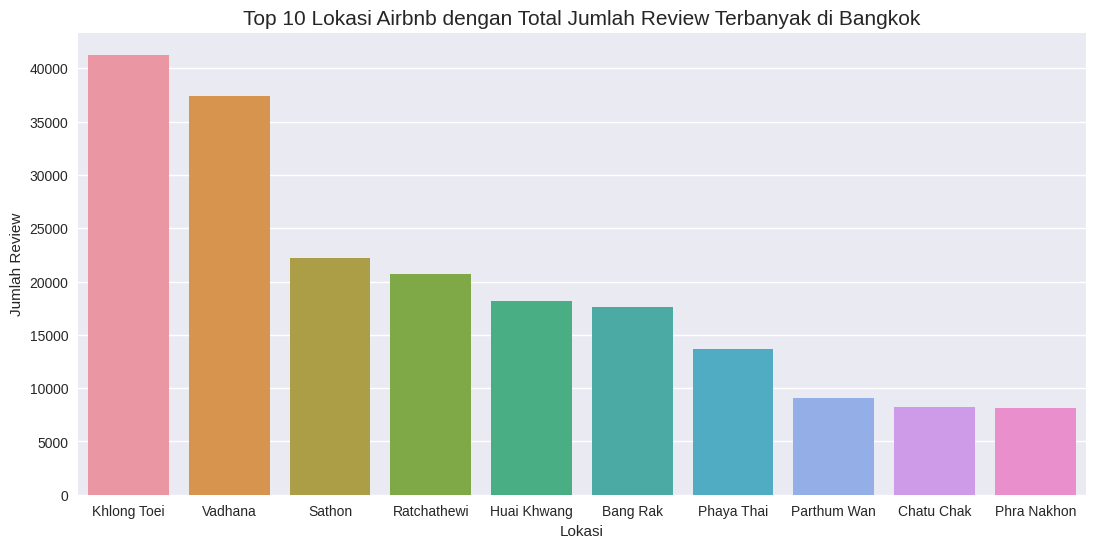

In [27]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_sum, x = 'neighbourhood', y = 'number_of_reviews')
plt.title('Top 10 Lokasi Airbnb dengan Total Jumlah Review Terbanyak di Bangkok', size=15)
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Review')
plt.show()

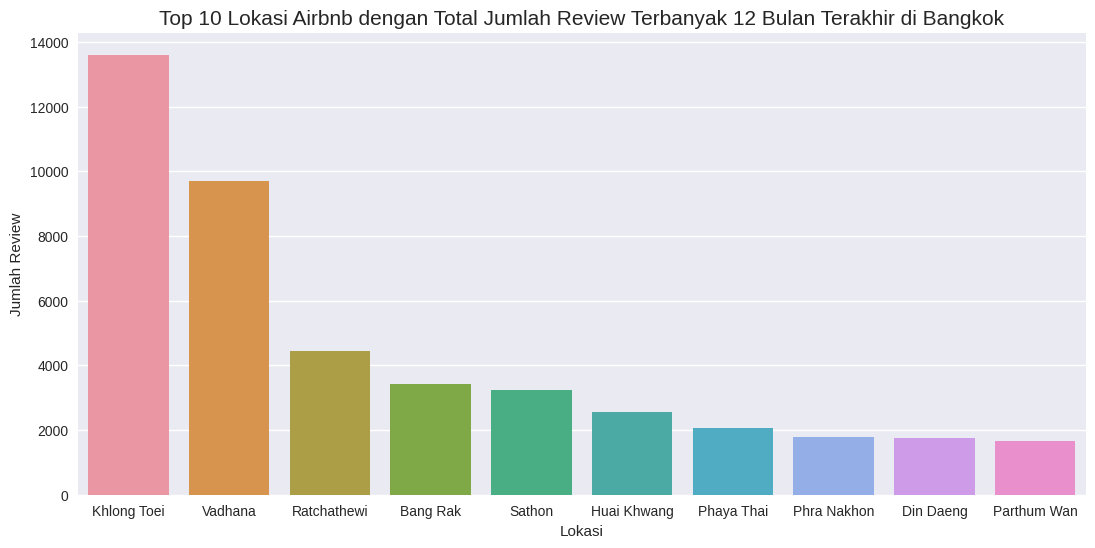

In [28]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_sum1, x = 'neighbourhood', y = 'number_of_reviews_ltm')
plt.title('Top 10 Lokasi Airbnb dengan Total Jumlah Review Terbanyak 12 Bulan Terakhir di Bangkok', size=15)
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Review')
plt.show()

Dari barplot tersebut, kita bisa melihat lokasi Airbnb yang paling populer di Bangkok. Melalui riset di google, dapat diketahui hal-hal berikut:
1. Khlong Toei: Merupakan district yang terkenal dengan marketnya (Khlong Toei Market) yang murah dan menjual berbagai jenis bahan makanan dan makanan jadi.
2. Vadhana: Juga dapat disebut sebagai Watthana, merupakan district yang terkenal dengan pusat perbelanjaan dan kuliner yang modern.
3. Sathon: Merupakan district yang tergolong mewah dan memiliki banyak pilihan kuliner gourmet sampai high-end.
4. Ratchathewi: Merupakan district yang dekat dengan sarana transportasi (merupakan transport hub).
5. Huai Khwang: Merupakan district yang kaya akan wisata budaya (cultural landmark) seperti Siam Niramit Theatre.
6. Bang Rak: Merupakan district yang terkenal dengan pusat belanja dan hiburannya.
7. Phaya Thai: Merupakan district tempat pemukiman affluent yang memiliki banyak pilihan kafe outdoor dan coffee shop.
8. Parthum Wan: Lebih dikenal dengan Pathum Wan, merupakan district yang terkenal dengan pusat perbelanjaannya, yaitu mega-mall Siam.
9. Chatu Chak: Merupakan district yang terkenal dengan marketnya yang hanya buka di akhir pekan (Chatuchak Market) yang menjual berbagai macam barang mulai dari makanan, hiasan patung buddha, keramik, oleh-oleh, dsb.
10. Phra Nakhon: Merupakan district yang terkenal dengan bangunan bersejarahnya seperti Wat Pho, Grand Palace, dsb.
11. Din Daeng (12 bulan terkahir): Merupakan district yang terkenal dengan marketnya.

Dari informasi tersebut, dapat disimpulkan bahwa lokasi-lokasi tersebut merupakan *destinasi turis yang populer*. Lokasi-lokasi tersebut memiliki berbagai destinasi wisata seperti market, pusat perbelanjaan, bangunan bersejarah, wisata budaya, dan dalam kasus khusus dekat dengan sarana transportasi (Ratchathewi) sehingga mempermudah akses bepergian. Hal inilah yang menyebabkan lokasi-lokasi tersebut populer di kalangan guest Airbnb yang mencari tempat tinggal sementara, dimana sebagian besar alasan guest mencari tempat tinggal sementara adalah dalam rangka liburan atau rekreasi.
Lokasi Airbnb yang populer dalam 12 bulan terakhir tidak banyak berubah terhadap lokasi Airbnb yang populer secara keseluruhan. Hanya terjadi perubahan urutan dan 1 district baru (Din Daeng) pada lokasi Airbnb yang populer dalam 12 bulan terakhir. Hal tersebut menunjukkan bahwa lokasi-lokasi dalam daftar memang sangat populer di kalangan guest.

## Berdasarkan Host

Selanjutnya, mari kita lihat bagaimana pengaruh host terhadap popularitas yang ditunjukkan oleh `number_of_reviews` dan `number_of_reviews_ltm`. Kita akan melakukan analisis dengan menjawab pertanyaan:

* Siapa host yang memiliki popularitas paling tinggi (ditunjukan dengan jumlah review yang paling tinggi)?

* Apakah terdapat perbedaan host populer dalam 12 bulan terakhir?

* Apakah terdapat hubungan antara jumlah listing yang dimiliki host (`calculated_host_listings_count`) terhadap popularitas?

In [29]:
# Menampilkan 10 host yang memiliki jumlah review terbanyak
df_host_sum = df.groupby('host_name')[['number_of_reviews']].sum().reset_index()
df_host_sum.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
top_10_host = df_host_sum.head(10)
top_10_host.set_index('host_name', inplace = True)
top_10_host.reset_index(inplace = True)
top_10_host

,host_name,number_of_reviews
0,Evan,6117
1,Tony,5010
2,Curry,4708
3,Themustang,3584
4,K,2962
5,Patty,2929
6,Max,2915
7,Bee,2823
8,Ed,2817
9,Taosiam,2681


In [30]:
# Menampilkan 10 host yang memiliki jumlah review dalam 12 bulan terakhir terbanyak
df_host_sum1 = df.groupby('host_name')[['number_of_reviews_ltm']].sum().reset_index()
df_host_sum1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
top_10_host1 = df_host_sum1.head(10)
top_10_host1.set_index('host_name', inplace = True)
top_10_host1.reset_index(inplace = True)
top_10_host1

,host_name,number_of_reviews_ltm
0,Curry,1766
1,Tony,1169
2,Mike,863
3,Max,844
4,Noons,818
5,Ed,802
6,N'Dee,750
7,Yefeng,702
8,Ludoping,653
9,Eva,603


In [31]:
host = []
list_count = []

for i in df_host_sum['host_name']:
  host.append(i)
  list_count.append(len(df[df["host_name"] == i]))

In [32]:
host1 = []
list_count1 = []

for i in df_host_sum1['host_name']:
  host1.append(i)
  list_count1.append(len(df[df["host_name"] == i]))

In [33]:
# Menampilkan jumlah listing yang dimiliki oleh Top 10 Host
df_list_count = pd.DataFrame(zip(host, list_count), columns = ['host_name', 'list_count'])
df_list_count

,host_name,list_count
0,Evan,37
1,Tony,50
2,Curry,228
3,Themustang,10
4,K,91
...,...,...
5307,Santa,1
5308,Morakot,1
5309,Mopgi,1
5310,Jakkrapant,1


In [34]:
# Menampilkan jumlah listing yang dimiliki oleh Top 10 Host dalam 12 bulan terakhir
df_list_count1 = pd.DataFrame(zip(host1, list_count1), columns = ['host_name', 'list_count'])
df_list_count1.head(10)

,host_name,list_count
0,Curry,228
1,Tony,50
2,Mike,55
3,Max,49
4,Noons,99
5,Ed,60
6,N'Dee,23
7,Yefeng,24
8,Ludoping,56
9,Eva,50


In [35]:
# Menggabungkan tabel top 10 host dan listing
result = pd.merge(df_host_sum, df_list_count, on='host_name', how='inner')
result.head(10)

,host_name,number_of_reviews,list_count
0,Evan,6117,37
1,Tony,5010,50
2,Curry,4708,228
3,Themustang,3584,10
4,K,2962,91
5,Patty,2929,54
6,Max,2915,49
7,Bee,2823,62
8,Ed,2817,60
9,Taosiam,2681,34


In [36]:
# Menggabungkan tabel top 10 host dalam 12 bulan terakhir dan listing
result1 = pd.merge(df_host_sum1, df_list_count1, on='host_name', how='inner')
result1.head(10)

,host_name,number_of_reviews_ltm,list_count
0,Curry,1766,228
1,Tony,1169,50
2,Mike,863,55
3,Max,844,49
4,Noons,818,99
5,Ed,802,60
6,N'Dee,750,23
7,Yefeng,702,24
8,Ludoping,653,56
9,Eva,603,50


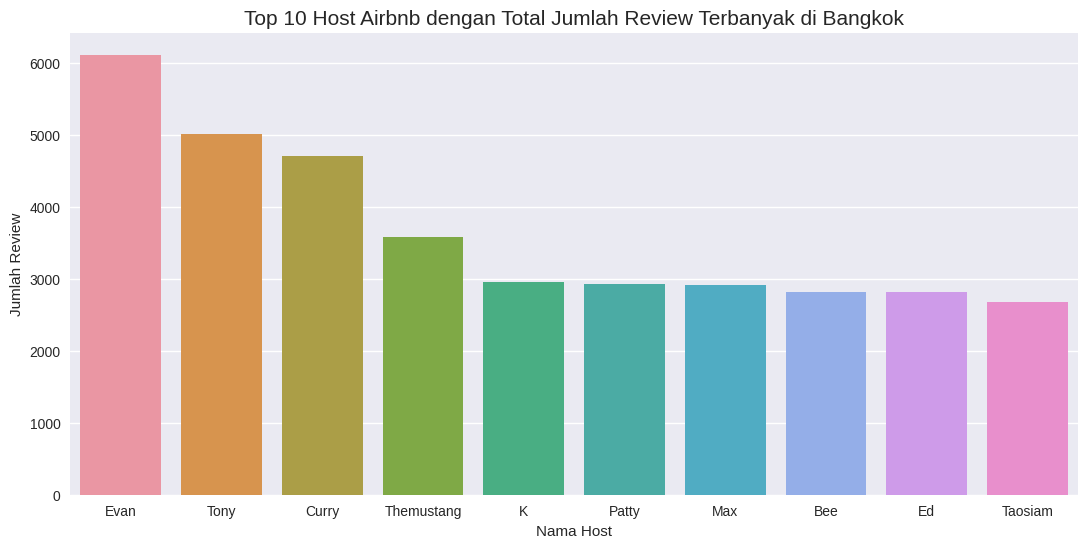

In [37]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_host, x = 'host_name', y = 'number_of_reviews')
plt.title('Top 10 Host Airbnb dengan Total Jumlah Review Terbanyak di Bangkok', size=15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Review')
plt.show()

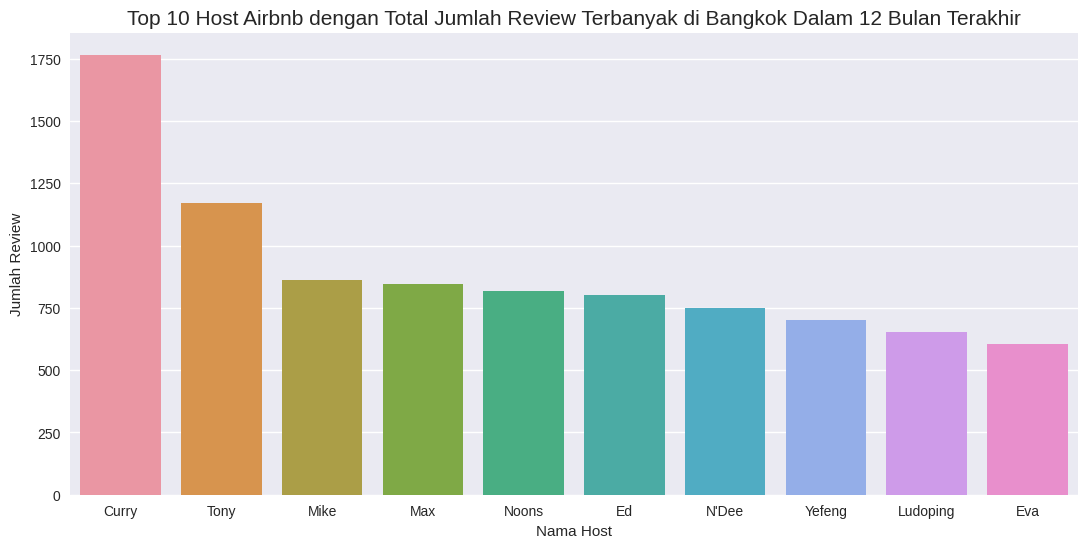

In [38]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_host1, x = 'host_name', y = 'number_of_reviews_ltm')
plt.title('Top 10 Host Airbnb dengan Total Jumlah Review Terbanyak di Bangkok Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Review')
plt.show()

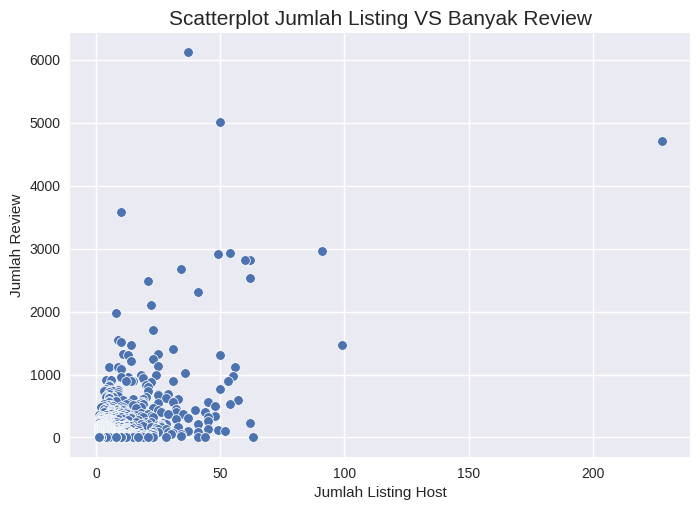

In [39]:
sns.scatterplot(x = result['list_count'], y = result['number_of_reviews'])
plt.title('Scatterplot Jumlah Listing VS Banyak Review', size=15)
plt.xlabel('Jumlah Listing Host')
plt.ylabel('Jumlah Review')
plt.show()

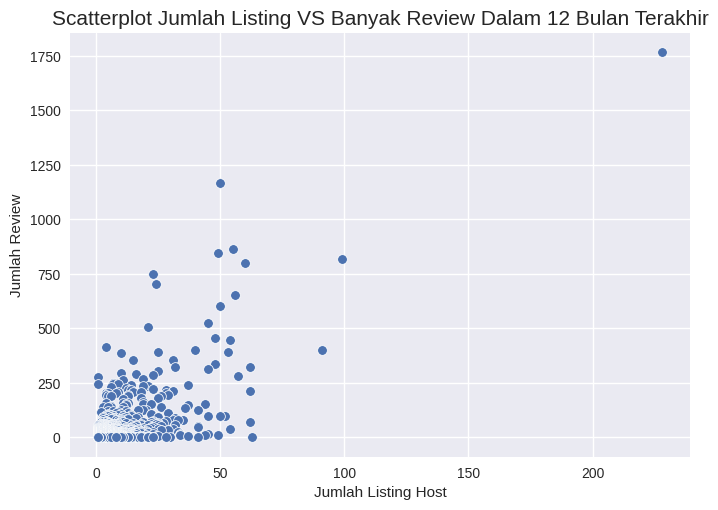

In [40]:
sns.scatterplot(x = result1['list_count'], y = result1['number_of_reviews_ltm'])
plt.title('Scatterplot Jumlah Listing VS Banyak Review Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Jumlah Listing Host')
plt.ylabel('Jumlah Review')
plt.show()

In [41]:
# Cek distribusi list_count
from scipy.stats import normaltest
stats, pval=normaltest(result['list_count'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [42]:
# Cek distribusi number_of_reviews
from scipy.stats import normaltest
stats, pval=normaltest(result['number_of_reviews'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [43]:
# Cek distribusi number_of_reviews_ltm
from scipy.stats import normaltest
stats, pval=normaltest(result['number_of_reviews'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [44]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
result[['list_count', 'number_of_reviews']].corr(method='spearman')

,list_count,number_of_reviews
list_count,1.000000,0.534758
number_of_reviews,0.534758,1.000000


In [45]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
result1[['list_count', 'number_of_reviews_ltm']].corr(method='spearman')

,list_count,number_of_reviews_ltm
list_count,1.000000,0.497786
number_of_reviews_ltm,0.497786,1.000000


Dari barplot di atas, dapat dilihat 10 Host yang paling populer di Airbnb, baik secara keseluruhan dan dalam 12 bulan terakhir. Host-host tersebut memiliki jumlah listing yang beragam di aplikasi Airbnb.

Untuk mengetahui hubungan antara jumlah listing yang dimiliki host terhadap popularitas (jumlah review) secara keseluruhan, dibentuk scatterplot dan uji korelasi yang memperlihatkan hubungan antara keduanya. Karena berdistribusi tidak normal, uji korelasi dilakukan dengan metode spearman.

Dari scatterplot, tidak terlalu terlihat hubungan antara jumlah listing dan popularitas. Namun melalui uji korelasi, didapatkan nilai 0.534812 (keseluruhan) dan 0.497786 (12 bulan terakhir) yang menunjukkan bahwa keduanya berkolerasi sedang positif. Interpretasi tersebut menunjukkan bahwa semakin banyak jumlah listing yang dimiliki oleh host, maka akan semakin banyak juga jumlah review yang didapatkan oleh suatu host.

Namun, apabila kita berfokus pada Top 10 Host secara keseluruhan, dapat terlihat bahwa jumlah listing tidak memberikan pengaruh yang signifikan terhadap jumlah review. Host atas nama Curry yang memiliki jumlah listing terbanyak (228 listing) berada di posisi ketiga, dikalahkan oleh host atas nama Evan (37) dan Tony (50). Bahkan Themustang yang hanya memiliki 10 listing berada di posisi keempat.

Dalam 12 bulan terakhir, terjadi perubahan top 10 host. Evan yang secara keseluruhan merupakan host dengan jumlah review tertinggi tidak lagi berada di top 10 host dalam 12 bulan terakhir. Posisi pertama berhasil ditempatkan oleh Curry yang memiliki jumlah listing terbanyak (228), dilanjutkan dengan Tony, Max, dan Ed yang tetap mempertahankan posisinya di top 10 host. Host atas nama Themustang yang hanya memiliki 10 listing juga tidak lagi berada di posisi top 10 dalam 12 bulan terakhir.

Hal-hal tersebut menunjukkan bahwa jumlah listing terbukti memiliki korelasi dengan popularitas, tetapi bukanlah satu-satunya faktor yang mempengaruhi popularitas host.



In [46]:
# Jumlah listing host yang berada di Lokasi Top 10
host = []
lokasi = []
jumlah = []
n = 0

for i in top_10_host['host_name']:
  for j in top_10_sum['neighbourhood']:
    if len(df[(df['host_name'] == i) & (df['neighbourhood'] == j)]) > 0:
      n = 0
      host.append(i)
      lokasi.append(j)
      n = len(df[(df['host_name'] == i) & (df['neighbourhood'] == j)])
      jumlah.append(n)

hasil = pd.DataFrame(zip(host, lokasi, jumlah), columns = ['host_name', 'neighbourhood', 'listing'])
hasil.head()

,host_name,neighbourhood,listing
0,Evan,Sathon,30
1,Evan,Chatu Chak,1
2,Tony,Khlong Toei,22
3,Tony,Vadhana,6
4,Tony,Ratchathewi,1


In [47]:
# Jumlah listing host (12 bulan terakhir) yang berada di Lokasi Top 10
host1 = []
lokasi1 = []
jumlah1 = []
n = 0

for i in top_10_host1['host_name']:
  for j in top_10_sum1['neighbourhood']:
    if len(df[(df['host_name'] == i) & (df['neighbourhood'] == j)]) > 0:
      n = 0
      host1.append(i)
      lokasi1.append(j)
      n = len(df[(df['host_name'] == i) & (df['neighbourhood'] == j)])
      jumlah1.append(n)

hasil1 = pd.DataFrame(zip(host1, lokasi1, jumlah1), columns = ['host_name', 'neighbourhood', 'listing'])
hasil1.head()

,host_name,neighbourhood,listing
0,Curry,Khlong Toei,52
1,Curry,Vadhana,2
2,Curry,Ratchathewi,72
3,Curry,Bang Rak,4
4,Curry,Sathon,32


In [48]:
# Persentase listing host yang berada di Lokasi Top 10
host = []
persentase = []

for i in result['host_name'].head(10):
  host.append(i)
  persentase.append(hasil[hasil['host_name'] == i]['listing'].sum()/result[result['host_name'] == i]['list_count'].sum())

df_persen = pd.DataFrame(zip(host,persentase), columns= ['host_name', 'persentase'])
df_persen

,host_name,persentase
0,Evan,0.837838
1,Tony,0.940000
2,Curry,0.951754
3,Themustang,1.000000
4,K,0.681319
5,Patty,0.851852
6,Max,0.938776
7,Bee,0.854839
8,Ed,0.966667
9,Taosiam,0.970588


In [49]:
# Persentase listing host (12 bulan terakhir) yang berada di Lokasi Top 10
host1 = []
persentase1 = []

for i in result1['host_name'].head(10):
  host1.append(i)
  persentase1.append(hasil1[hasil1['host_name'] == i]['listing'].sum()/result1[result1['host_name'] == i]['list_count'].sum())

df_persen1 = pd.DataFrame(zip(host1,persentase1), columns= ['host_name', 'persentase'])
df_persen1

,host_name,persentase
0,Curry,0.951754
1,Tony,0.960000
2,Mike,0.945455
3,Max,0.918367
4,Noons,0.969697
5,Ed,0.966667
6,N'Dee,1.000000
7,Yefeng,1.000000
8,Ludoping,0.982143
9,Eva,0.960000


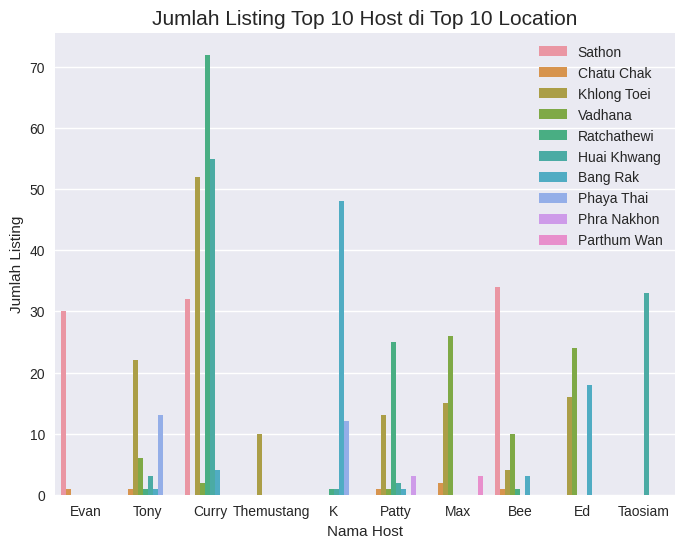

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x = hasil['host_name'], y = hasil['listing'], hue = hasil['neighbourhood'])
plt.title('Jumlah Listing Top 10 Host di Top 10 Location', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Listing')
plt.legend(loc=1)
plt.show()

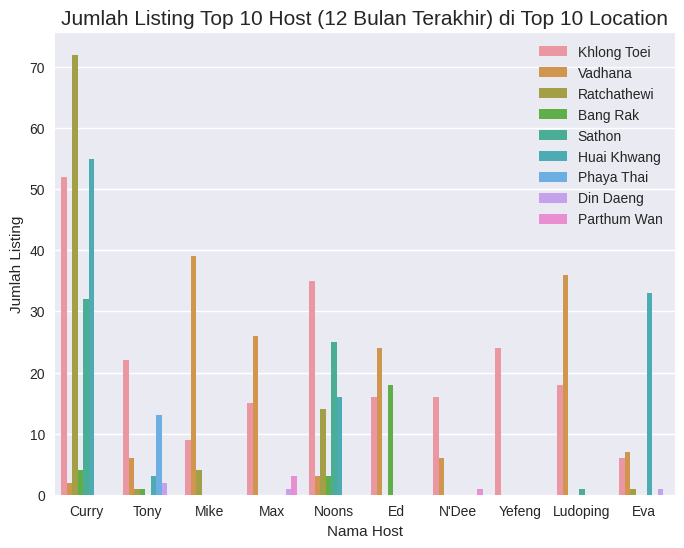

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x = hasil1['host_name'], y = hasil1['listing'], hue = hasil1['neighbourhood'])
plt.title('Jumlah Listing Top 10 Host (12 Bulan Terakhir) di Top 10 Location', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Listing')
plt.legend(loc=1)
plt.show()

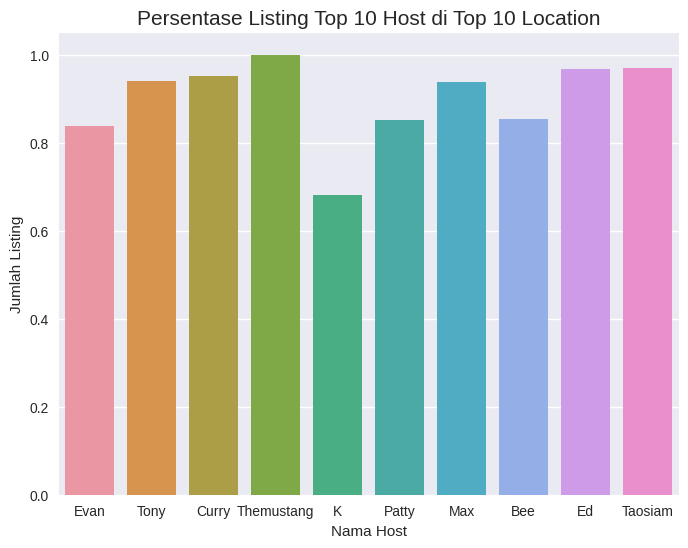

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x = df_persen['host_name'], y = df_persen['persentase'])
plt.title('Persentase Listing Top 10 Host di Top 10 Location', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Listing')
plt.legend(loc=1)
plt.show()

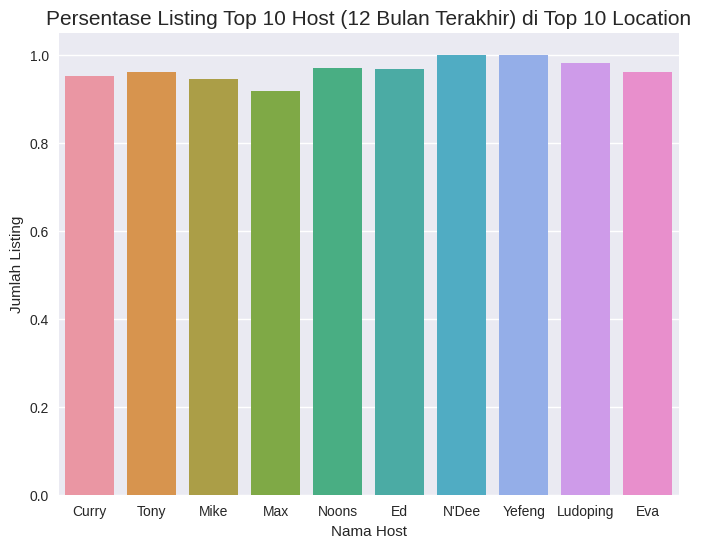

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x = df_persen1['host_name'], y = df_persen1['persentase'])
plt.title('Persentase Listing Top 10 Host (12 Bulan Terakhir) di Top 10 Location', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Listing')
plt.legend(loc=1)
plt.show()

Kedua barplot tersebut menunjukkan jumlah dan rata-rata listing top 10 host, baik secara keseluruhan dan dalam 12 bulan terakhir, yang berada di top 10 lokasi.

Secara keseluruhan, dapat disimpulkan bahwa semua top 10 host memiliki listing di top 10 lokasi sebesar lebih dari 65% dari total listing yang dimiliki oleh host.

Namun dalam 12 bulan terakhir, terjadi kenaikan persentase listing di top 10 lokasi menjadi lebih dari 91%. Host atas nama K yang hanya memiliki 68% listing di top 10 lokasi tidak lagi berada di top 10 host dalam 12 bulan terakhir.

Hal tersebut memperkuat asumsi bahwa lokasi memberikan pengaruh yang signifikan terhadap popularitas host.

## Berdasarkan Tipe Listing
Selanjutnya, mari kita lihat bagaimana pengaruh `room_type` terhadap popularitas yang ditunjukkan oleh `number_of_reviews`. Kita akan melakukan analisis dengan menjawab pertanyaan:

* Jenis room apa yang memiliki popularitas paling tinggi (ditunjukan dengan nilai `number_of_reviews` paling tinggi)?
* Apakah terdapat kaitan antara tipe listing dengan top 10 lokasi?
* Apakah terdapat kaitan antara tipe listing dengan top 10 host?


In [54]:
# Menampilkan agregasi room_type
df_room = df.groupby('room_type')[['number_of_reviews']].sum().reset_index()
df_room.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
df_room.set_index('room_type', inplace = True)
df_room.reset_index(inplace = True)
df_room

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Private room,50710
2,Hotel room,12700
3,Shared room,2682


In [55]:
# Menampilkan agregasi room_type dalam 12 bulan terakhir
df_room1 = df.groupby('room_type')[['number_of_reviews_ltm']].sum().reset_index()
df_room1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
df_room1.set_index('room_type', inplace = True)
df_room1.reset_index(inplace = True)
df_room1

,room_type,number_of_reviews_ltm
0,Entire home/apt,44535
1,Private room,9185
2,Hotel room,1258
3,Shared room,218


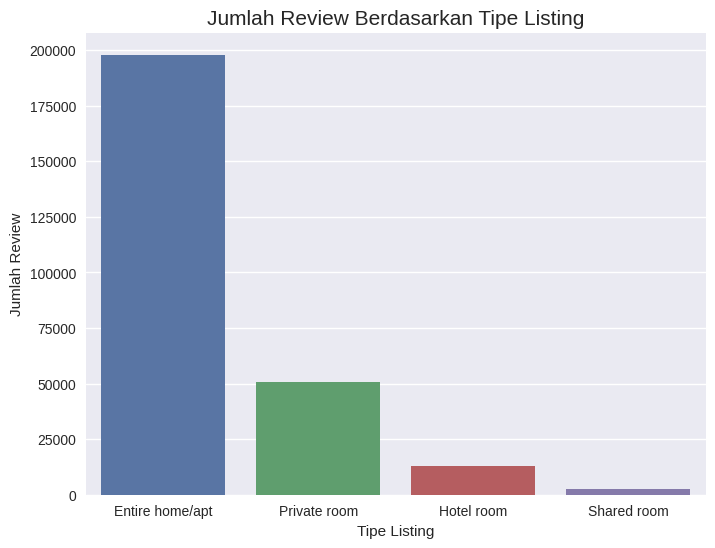

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(data = df_room, x = 'room_type', y = 'number_of_reviews')
plt.title('Jumlah Review Berdasarkan Tipe Listing', size=15)
plt.xlabel('Tipe Listing')
plt.ylabel('Jumlah Review')
plt.show()

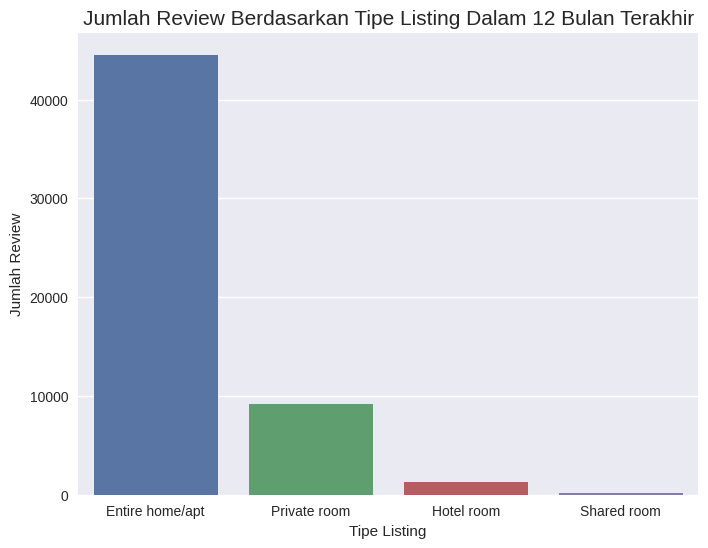

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(data = df_room1, x = 'room_type', y = 'number_of_reviews_ltm')
plt.title('Jumlah Review Berdasarkan Tipe Listing Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Tipe Listing')
plt.ylabel('Jumlah Review')
plt.show()

Dapat dilihat dari barplot bahwa tipe listing entire home/apt merupakan tipe yang paling populer (baik secara keseluruhan dan dalam 12 bulan terakhir) dibanding tipe yang lain secara signifikan, dilanjutkan dengan private room, hotel room, dan shared room.

Dapat disimpulkan bahwa preferensi guest terkait tipe listing tidak berubah.

In [58]:
# Menampilkan room type di top 10 lokasi
df_lokasi_room = df.groupby(['neighbourhood', 'room_type'])[['number_of_reviews']].sum().reset_index()
df_lokasi_room.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
top_10_lokroom = df_lokasi_room.head(10)
top_10_lokroom.set_index('neighbourhood', inplace = True)
top_10_lokroom.reset_index(inplace = True)
top_10_lokroom

,neighbourhood,room_type,number_of_reviews
0,Khlong Toei,Entire home/apt,34377
1,Vadhana,Entire home/apt,32536
2,Sathon,Entire home/apt,19566
3,Huai Khwang,Entire home/apt,14012
4,Ratchathewi,Entire home/apt,13998
5,Bang Rak,Entire home/apt,13600
6,Phaya Thai,Entire home/apt,10003
7,Parthum Wan,Entire home/apt,7664
8,Chatu Chak,Entire home/apt,5782
9,Phra Nakhon,Private room,5040


In [59]:
# Menampilkan room type di top 10 lokasi dalam 12 bulan terakhir
df_lokasi_room1 = df.groupby(['neighbourhood', 'room_type'])[['number_of_reviews_ltm']].sum().reset_index()
df_lokasi_room1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
top_10_lokroom1 = df_lokasi_room1.head(10)
top_10_lokroom1.set_index('neighbourhood', inplace = True)
top_10_lokroom1.reset_index(inplace = True)
top_10_lokroom1

,neighbourhood,room_type,number_of_reviews_ltm
0,Khlong Toei,Entire home/apt,12422
1,Vadhana,Entire home/apt,8692
2,Ratchathewi,Entire home/apt,3289
3,Sathon,Entire home/apt,2863
4,Bang Rak,Entire home/apt,2602
5,Huai Khwang,Entire home/apt,2167
6,Phaya Thai,Entire home/apt,1829
7,Din Daeng,Entire home/apt,1369
8,Parthum Wan,Entire home/apt,1255
9,Phra Nakhon,Private room,1141


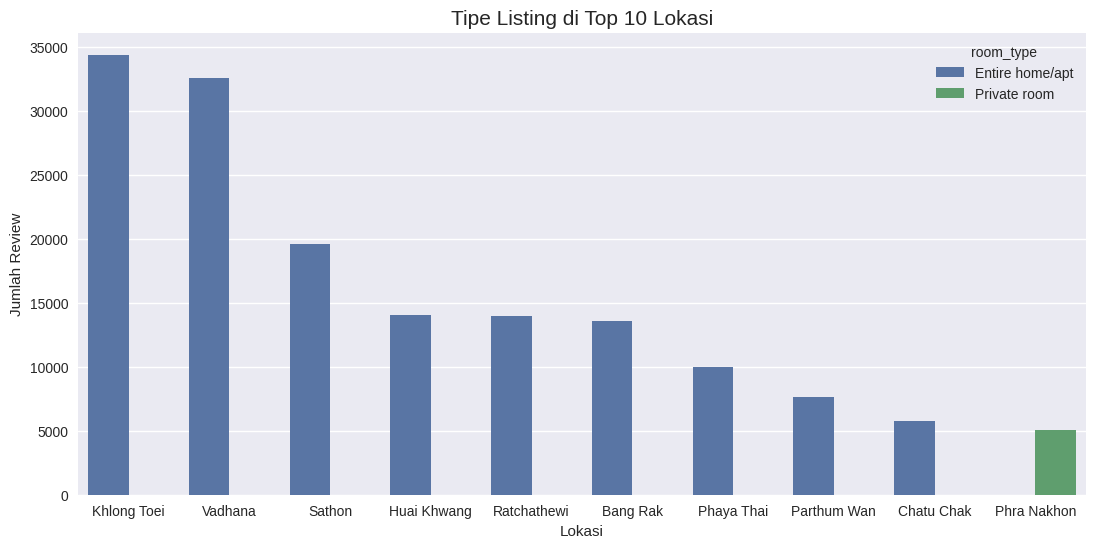

In [60]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_lokroom, x = 'neighbourhood', y = 'number_of_reviews', hue = 'room_type')
plt.title('Tipe Listing di Top 10 Lokasi', size=15)
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Review')
plt.show()

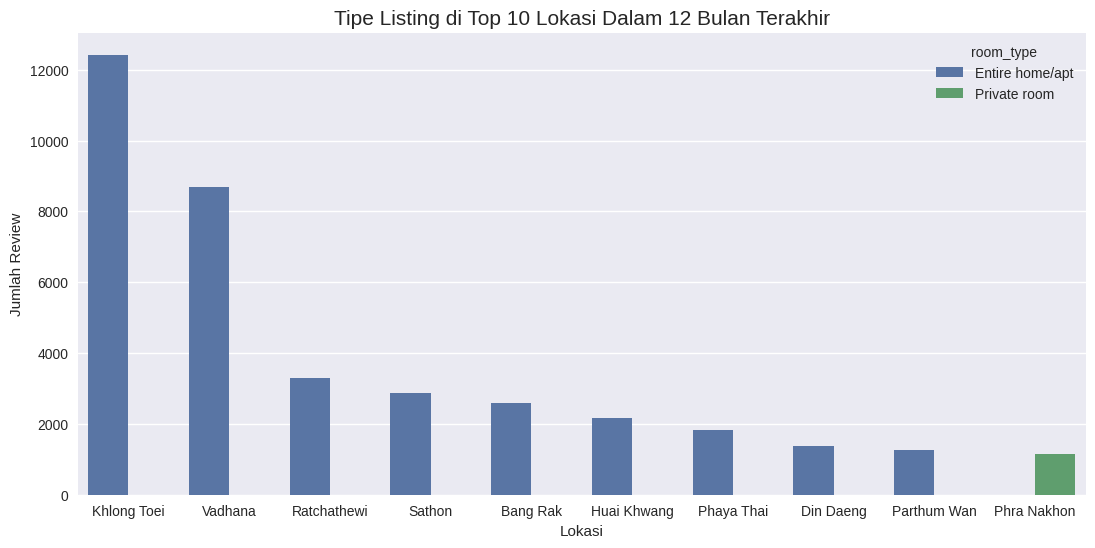

In [61]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_lokroom1, x = 'neighbourhood', y = 'number_of_reviews_ltm', hue = 'room_type')
plt.title('Tipe Listing di Top 10 Lokasi Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Review')
plt.show()

Dapat dilihat pada barplot bahwa mayortias tipe listing di top 10 lokasi (baik secara keseluruhan dan dalam 12 bulan terakhir) terdiri dari tipe listing entire home/apt (paling populer) dan private room (hanya ada di Nakhon).

Hal tersebut menunjukkan bahwa tipe listing (`room_type`) memegang peranan penting dalam menentukan popularitas lokasi listing.

In [62]:
# Menampilkan room type yang disediakan top 10 host
df_lokasi_host = df.groupby(['host_name', 'room_type'])[['number_of_reviews']].sum().reset_index()
df_lokasi_host.sort_values(by = ['number_of_reviews'], ascending = False, inplace = True)
top_10_lokhost = df_lokasi_host.head(10)
top_10_lokhost.set_index('host_name', inplace = True)
top_10_lokhost.reset_index(inplace = True)
top_10_lokhost

,host_name,room_type,number_of_reviews
0,Evan,Entire home/apt,6117
1,Tony,Entire home/apt,5010
2,Curry,Entire home/apt,4708
3,Themustang,Hotel room,3584
4,Max,Entire home/apt,2837
5,Patty,Entire home/apt,2822
6,Ed,Entire home/apt,2783
7,Bee,Entire home/apt,2728
8,K,Entire home/apt,2531
9,Rebecca,Entire home/apt,2485


In [63]:
# Menampilkan room type yang disediakan top 10 host dalam 12 bulan terakhir
df_lokasi_host1 = df.groupby(['host_name', 'room_type'])[['number_of_reviews_ltm']].sum().reset_index()
df_lokasi_host1.sort_values(by = ['number_of_reviews_ltm'], ascending = False, inplace = True)
top_10_lokhost1 = df_lokasi_host1.head(10)
top_10_lokhost1.set_index('host_name', inplace = True)
top_10_lokhost1.reset_index(inplace = True)
top_10_lokhost1

,host_name,room_type,number_of_reviews_ltm
0,Curry,Entire home/apt,1766
1,Tony,Entire home/apt,1169
2,Mike,Entire home/apt,862
3,Noons,Entire home/apt,818
4,Ed,Entire home/apt,801
5,Max,Entire home/apt,782
6,N'Dee,Entire home/apt,750
7,Yefeng,Entire home/apt,702
8,Ludoping,Entire home/apt,638
9,Eva,Entire home/apt,603


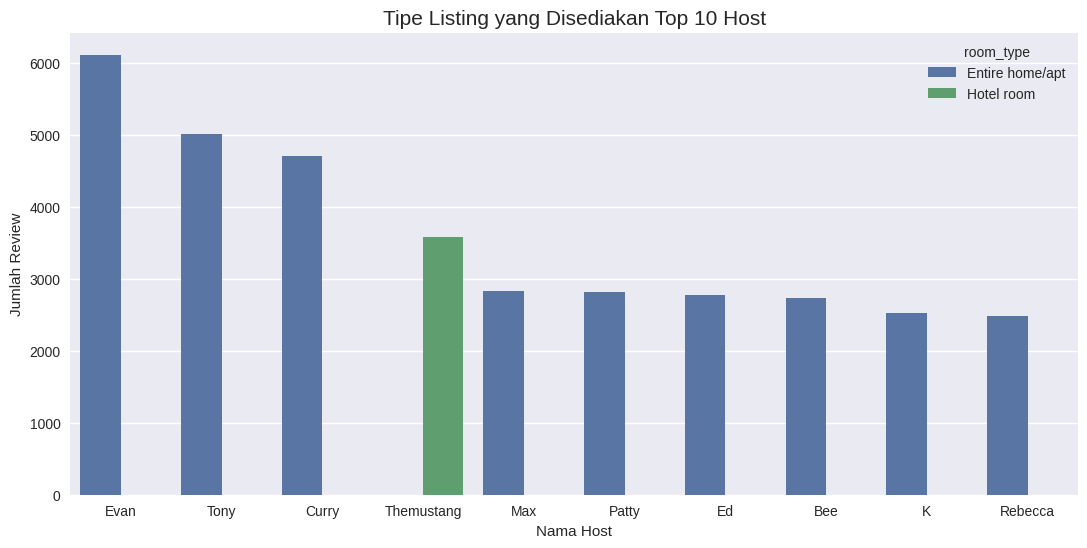

In [64]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_lokhost, x = 'host_name', y = 'number_of_reviews', hue = 'room_type')
plt.title('Tipe Listing yang Disediakan Top 10 Host', size=15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Review')
plt.show()

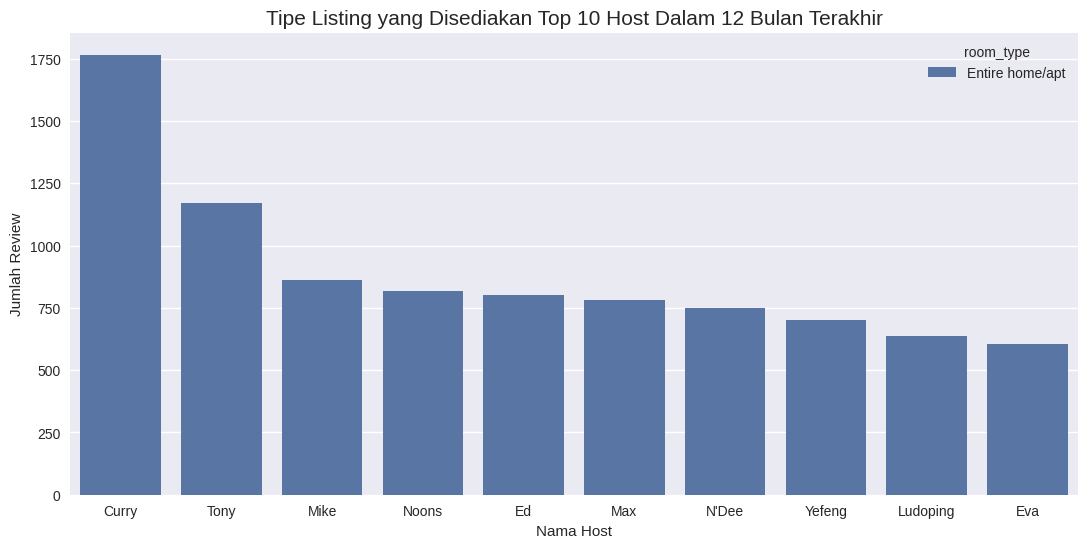

In [65]:
plt.figure(figsize=(13,6))
sns.barplot(data = top_10_lokhost1, x = 'host_name', y = 'number_of_reviews_ltm', hue = 'room_type')
plt.title('Tipe Listing yang Disediakan Top 10 Host Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Nama Host')
plt.ylabel('Jumlah Review')
plt.show()

Barplot tersebut menunjukkan tipe listing yang disediakan oleh top 10 host, baik secara keseluruhan dan dalam 12 bulan terakhir.

Dapat dilihat bahwa sebagian besar host menawarkan tipe listing entire home/apt, yang merupakan tipe listing paling populer. Hanya host atas nama Themustang yang menawarkan tipe listing hotel room.

Namun dalam 12 bulan terakhir, semua top 10 host hanya menawarkan tipe listing yang paling populer, yaitu entire home/apt.

Hal ini memperkuat peranan `room_type` sebagai salah satu faktor yang mempengaruhi popularitas listing.

## Berdasarkan Harga
Selanjutnya, mari kita lihat bagaimana pengaruh `price` terhadap popularitas yang ditunjukkan oleh `number_of_reviews`. Kita akan melakukan analisis dengan menjawab pertanyaan:

* Apakah harga memiliki hubungan dengan popularitas (ditunjukan dengan nilai `number_of_reviews` paling tinggi)?
* Apakah terdapat kaitan antara harga dengan top 10 lokasi?
* Apakah terdapat kaitan antara harga dengan top 10 host?



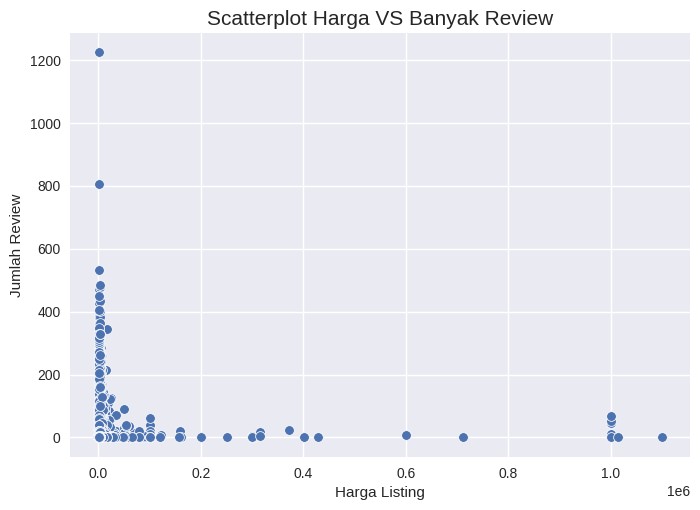

In [66]:
# Scatterplot hubungan harga dan jumlah review
sns.scatterplot(x = df['price'], y = df['number_of_reviews'])
plt.title('Scatterplot Harga VS Banyak Review', size=15)
plt.xlabel('Harga Listing')
plt.ylabel('Jumlah Review')
plt.show()

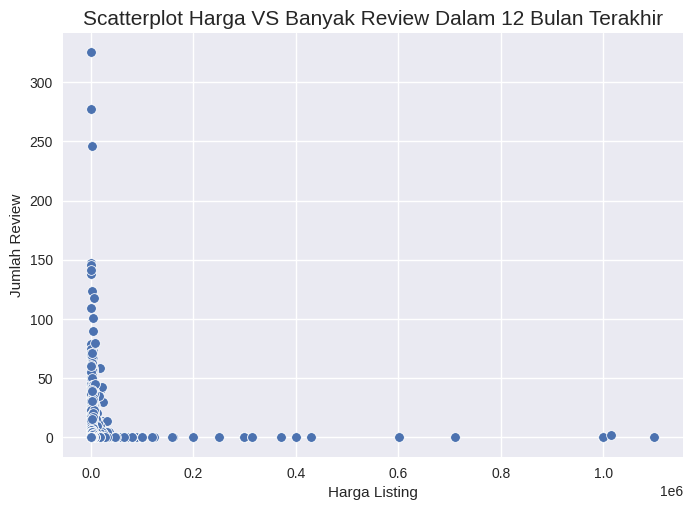

In [67]:
# Scatterplot hubungan harga dan jumlah review dalam 12 bulan terakhir
sns.scatterplot(x = df['price'], y = df['number_of_reviews_ltm'])
plt.title('Scatterplot Harga VS Banyak Review Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Harga Listing')
plt.ylabel('Jumlah Review')
plt.show()

In [68]:
# Cek distribusi price
from scipy.stats import normaltest
stats, pval=normaltest(df['price'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [69]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['price', 'number_of_reviews']].corr(method='spearman')

,price,number_of_reviews
price,1.000000,-0.020784
number_of_reviews,-0.020784,1.000000


In [70]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['price', 'number_of_reviews_ltm']].corr(method='spearman')

,price,number_of_reviews_ltm
price,1.000000,0.043644
number_of_reviews_ltm,0.043644,1.000000


Dapat dilihat bahwa korelasi harga dengan jumlah review tergolong korelasi lemah negatif (-0.020784) secara keseluruhan, dimana bertambahnya harga akan menurunkan popularitas listing, tetapi tidak secara signifikan.

Sedangkan korelasi harga dengan jumlah review tergolong tergolong lemah positif (0.043644) dalam 12 bulan terakhir, dimana bertambahnya harga akan meningkatkan popularitas listing, tetapi tidak secara signifikan. Hal tersebut diasumsikan dapat terjadi karena guest yang mencari tempat tinggal sementara di Airbnb sebagian besar adalah dengan maksud liburan, sehingga pengeluaran yang lebih untuk mendapat tempat tinggal sementara yang terbaik tidak menjadi suatu masalah.

Dapat disimpulan bahwa harga mempengaruhi popularitas (jumlah_review), tetapi tidak secara signifikan.

In [71]:
lokasi = []

for i in top_10_sum['neighbourhood']:
  lokasi.append(i)

In [72]:
# Menampilkan harga di top 10 lokasi
df_lokasi_price = df.groupby(['neighbourhood', 'room_type'])[['price']].mean().reset_index()
df_lokasi_price.sort_values(by = ['price'], ascending = False, inplace = True)
df_lokasi_price.set_index('neighbourhood', inplace = True)
top_10_lokprice = df_lokasi_price.loc[lokasi].reset_index()
top_10_lokprice.head()

,neighbourhood,room_type,price
0,Khlong Toei,Private room,5481.063395
1,Khlong Toei,Entire home/apt,3962.268421
2,Khlong Toei,Hotel room,2665.109589
3,Khlong Toei,Shared room,893.600000
4,Vadhana,Entire home/apt,4699.071675


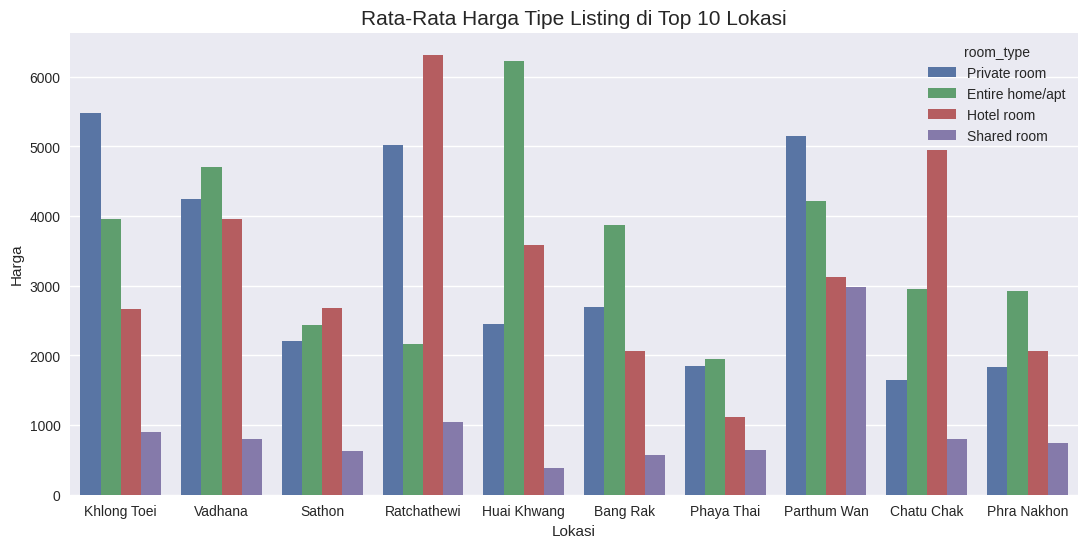

In [73]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_lokprice, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.title('Rata-Rata Harga Tipe Listing di Top 10 Lokasi', size = 15)
plt.xlabel('Lokasi')
plt.ylabel('Harga')
plt.show()

In [74]:
host = []
host1 = []

for i in top_10_host['host_name']:
  host.append(i)

for i in top_10_host1['host_name']:
  host1.append(i)

In [75]:
# Menampilkan harga top 10 host
df_host_price = df.groupby(['host_name', 'room_type'])[['price']].mean().reset_index()
df_host_price.sort_values(by = ['price'], ascending = False, inplace = True)
df_host_price.set_index('host_name', inplace = True)
top_10_hostprice = df_host_price.loc[host].reset_index()
top_10_hostprice.head()

,host_name,room_type,price
0,Evan,Entire home/apt,928.432432
1,Tony,Entire home/apt,1506.740000
2,Curry,Entire home/apt,1922.456140
3,Themustang,Hotel room,2291.800000
4,K,Entire home/apt,2715.189189


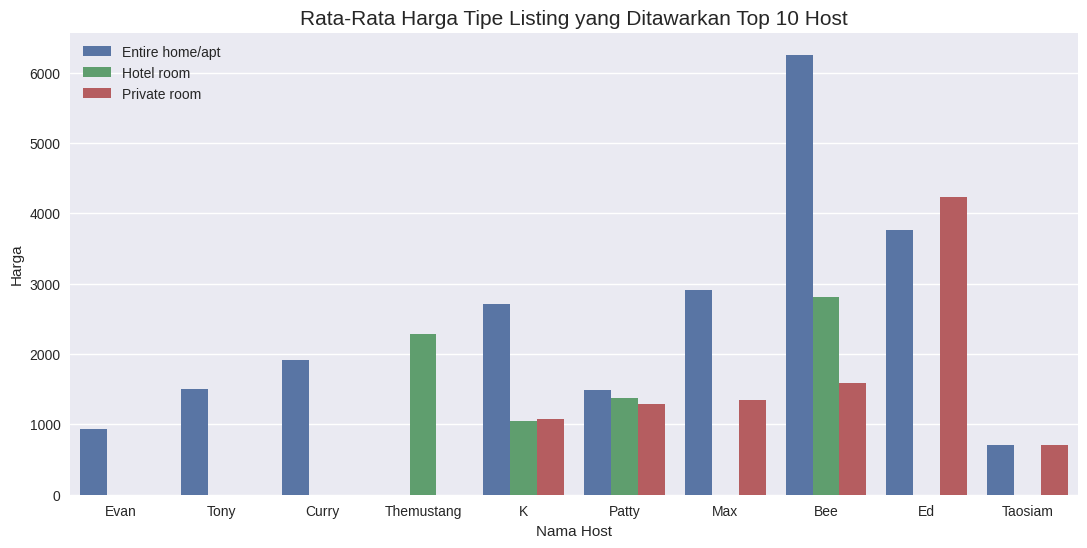

In [76]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_hostprice, x = 'host_name', y = 'price', hue = 'room_type')
plt.title('Rata-Rata Harga Tipe Listing yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Harga')
plt.legend(loc = 2)
plt.show()

In [77]:
# Menampilkan harga top 10 host 12 bulan terakhir
df_host_price1 = df.groupby(['host_name', 'room_type'])[['price']].mean().reset_index()
df_host_price1.sort_values(by = ['price'], ascending = False, inplace = True)
df_host_price1.set_index('host_name', inplace = True)
top_10_hostprice1 = df_host_price.loc[host1].reset_index()
top_10_hostprice1.head()

,host_name,room_type,price
0,Curry,Entire home/apt,1922.456140
1,Tony,Entire home/apt,1506.740000
2,Mike,Entire home/apt,3670.735849
3,Mike,Private room,482.500000
4,Max,Entire home/apt,2913.130435


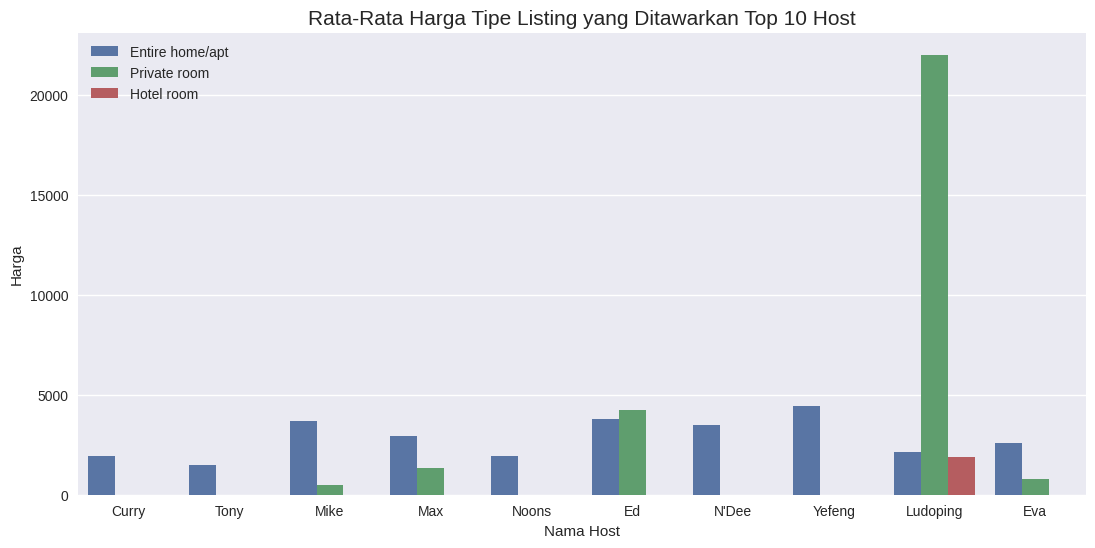

In [78]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_hostprice1, x = 'host_name', y = 'price', hue = 'room_type')
plt.title('Rata-Rata Harga Tipe Listing yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Harga')
plt.legend(loc = 2)
plt.show()

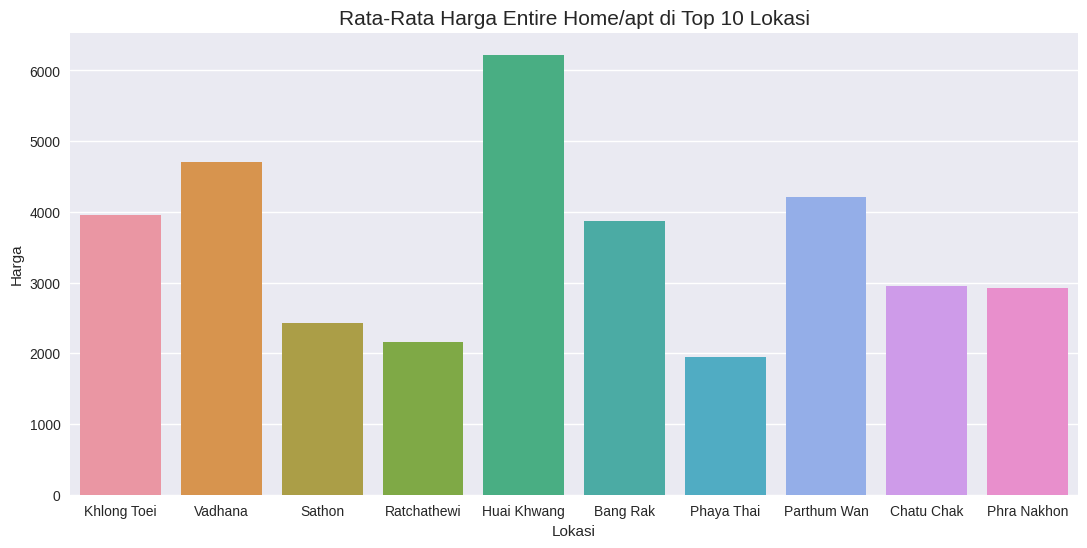

In [79]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_lokprice[top_10_lokprice['room_type'] == 'Entire home/apt'], x = 'neighbourhood', y = 'price')
plt.title('Rata-Rata Harga Entire Home/apt di Top 10 Lokasi', size = 15)
plt.xlabel('Lokasi')
plt.ylabel('Harga')
plt.show()

In [80]:
# Rata-rata harga Entire home/apt di semua Top 10 lokasi
rata2 = top_10_lokprice[top_10_lokprice['room_type'] == 'Entire home/apt']['price'].mean()
rata2

3538.294412767357

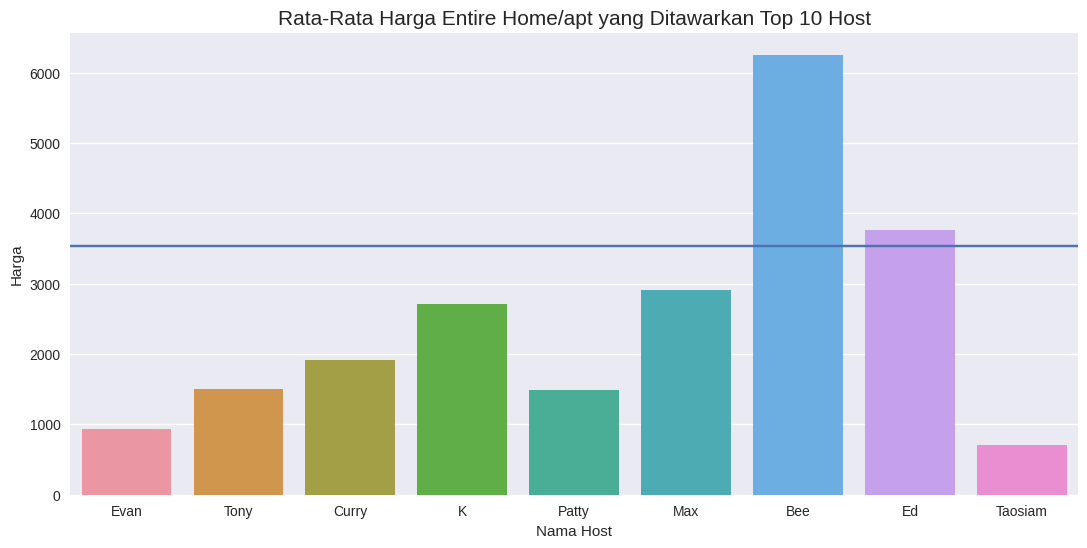

In [81]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostprice[top_10_hostprice['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'price')
graph.axhline(rata2)
plt.title('Rata-Rata Harga Entire Home/apt yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Harga')
plt.legend(loc = 2)
plt.show()

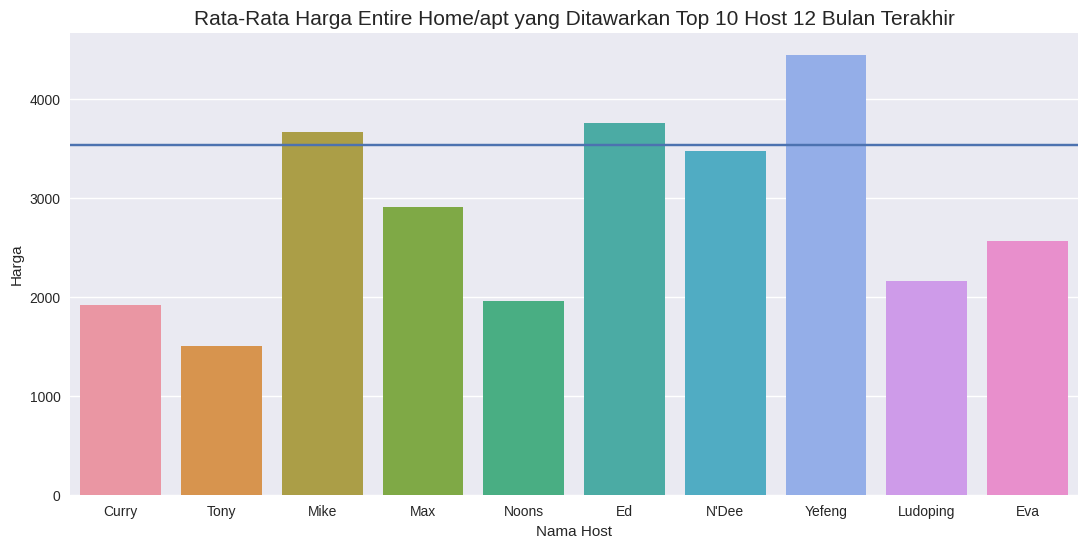

In [82]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostprice1[top_10_hostprice1['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'price')
graph.axhline(rata2)
plt.title('Rata-Rata Harga Entire Home/apt yang Ditawarkan Top 10 Host 12 Bulan Terakhir', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Harga')
plt.legend(loc = 2)
plt.show()

Walaupun harga tergolong tidak signifikan melalui uji korelasi, dari visualisasi barplot kita bisa melihat bahwa rata-rata harga tipe listing entire home/apt yang ditawarkan oleh top 10 host (baik secara keseluruhan maupun dalam 12 bulan terakhir) sebagian besar berada di bawah rata-rata harga tipe listing entire home/apt di top 10 lokasi.

Dapat disimpulkan bahwa walaupun tidak signifikan, harga tetap menjadi pertimbangan guest dalam memilih listing.

## Berdasarkan Minimum Nights
Selanjutnya, mari kita analisis minimum nights terhadap jumlah review.


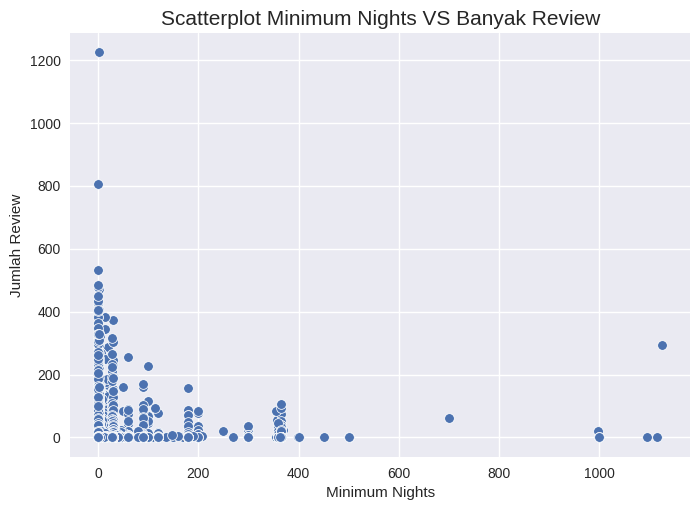

In [83]:
# Scatterplot hubungan minimum nights dan jumlah review
sns.scatterplot(x = df['minimum_nights'], y = df['number_of_reviews'])
plt.title('Scatterplot Minimum Nights VS Banyak Review', size=15)
plt.xlabel('Minimum Nights')
plt.ylabel('Jumlah Review')
plt.show()

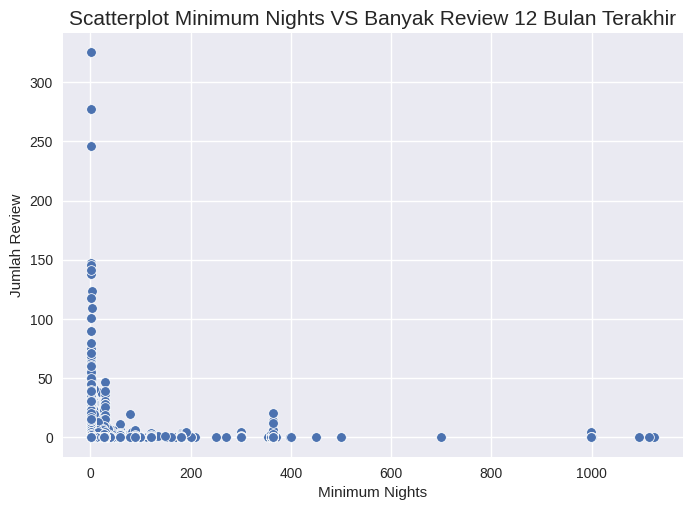

In [84]:
# Scatterplot hubungan minimum nights dan jumlah review da;am 12 bulan terakhir
sns.scatterplot(x = df['minimum_nights'], y = df['number_of_reviews_ltm'])
plt.title('Scatterplot Minimum Nights VS Banyak Review 12 Bulan Terakhir', size=15)
plt.xlabel('Minimum Nights')
plt.ylabel('Jumlah Review')
plt.show()

In [85]:
# Cek distribusi minimum nights
from scipy.stats import normaltest
stats, pval=normaltest(df['minimum_nights'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [86]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['minimum_nights', 'number_of_reviews']].corr(method='spearman')

,minimum_nights,number_of_reviews
minimum_nights,1.000000,0.036257
number_of_reviews,0.036257,1.000000


In [87]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['minimum_nights', 'number_of_reviews_ltm']].corr(method='spearman')

,minimum_nights,number_of_reviews_ltm
minimum_nights,1.000000,0.012681
number_of_reviews_ltm,0.012681,1.000000


Dapat dilihat bahwa lama penyewaan minimum (`minimum_nights`) berkolerasi lemah positif terhadap jumlah review, baik secara keseluruhan dan dalam 12 bulan terakhir.

Hal tersebut terjadi diduga karena lama penyewaan minimum yang paling umum adalah 1 hari dari keseluruhan listing di Bangkok, sehingga tidak terlalu terlihat korelasi yang ada antara lama penyewaan minimum dengan jumlah review.

In [88]:
# Menampilkan rata-rata lama sewa minimum di top 10 lokasi
df_lokasi_mn = df.groupby(['neighbourhood', 'room_type'])[['minimum_nights']].mean().reset_index()
df_lokasi_mn.sort_values(by = ['minimum_nights'], ascending = True, inplace = True)
df_lokasi_mn.set_index('neighbourhood', inplace = True)
top_10_lokmn = df_lokasi_mn.loc[lokasi].reset_index()
top_10_lokmn.head()

,neighbourhood,room_type,minimum_nights
0,Khlong Toei,Hotel room,1.383562
1,Khlong Toei,Shared room,1.400000
2,Khlong Toei,Private room,9.466258
3,Khlong Toei,Entire home/apt,16.326316
4,Vadhana,Shared room,1.207547


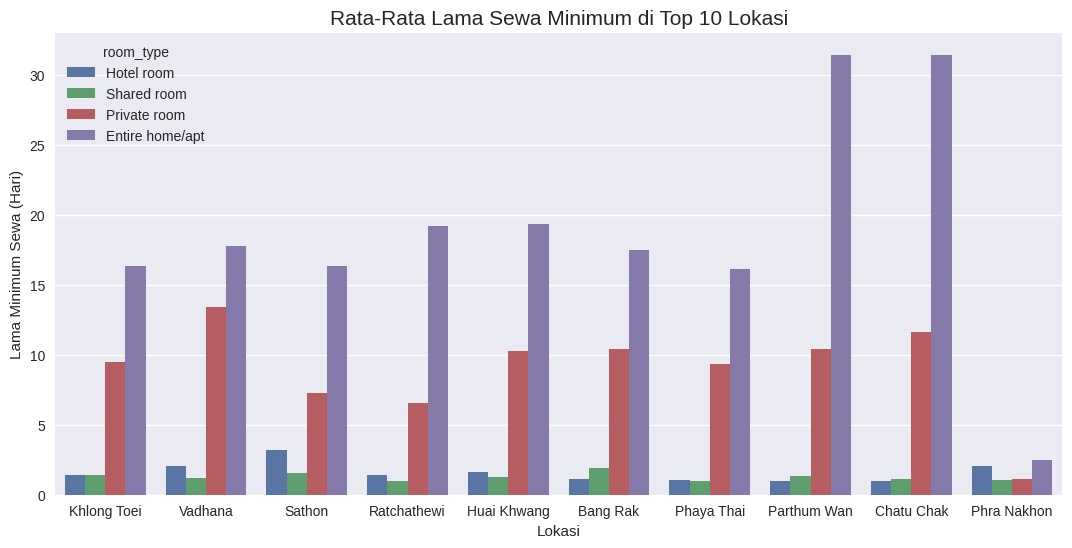

In [89]:
plt.figure(figsize=(13,6))
sns.barplot(data=top_10_lokmn, x = 'neighbourhood', y = 'minimum_nights', hue = 'room_type')
plt.title('Rata-Rata Lama Sewa Minimum di Top 10 Lokasi', size = 15)
plt.xlabel('Lokasi')
plt.ylabel('Lama Minimum Sewa (Hari)')
plt.show()

Dapat dilihat bahwa tipe listing entire home memiliki rata-rata lama sewa minimum tertinggi dibanding tipe listing yang lain. Hal tersebut tentunya masuk akal, karena penyewaan satu rumah penuh jarang (hampir tidak pernah) hanya digunakan untuk 1 hari saja. Mengingat tipe listing entire home/apt adalah yang paling populer, lama minimum sewa yang rendah kurang menentukan popularitas listing.

In [90]:
# Rata-rata minimum nights Entire home/apt di semua Top 10 lokasi
rata2 = top_10_lokmn[top_10_lokmn['room_type'] == 'Entire home/apt']['minimum_nights'].mean()
rata2

18.80389451771773

In [91]:
# Menampilkan minimum nights top 10 host
df_host_mn = df.groupby(['host_name', 'room_type'])[['minimum_nights']].mean().reset_index()
df_host_mn.sort_values(by = ['minimum_nights'], ascending = True, inplace = True)
df_host_mn.set_index('host_name', inplace = True)
top_10_hostmn = df_host_mn.loc[host].reset_index()
top_10_hostmn.head()

,host_name,room_type,minimum_nights
0,Evan,Entire home/apt,1.108108
1,Tony,Entire home/apt,1.820000
2,Curry,Entire home/apt,2.460526
3,Themustang,Hotel room,1.000000
4,K,Hotel room,1.000000


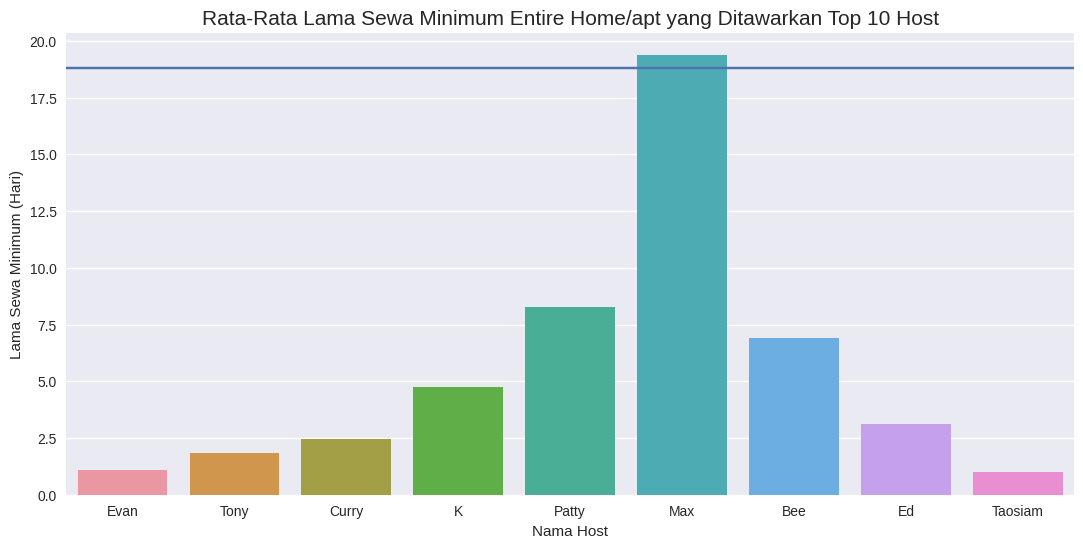

In [92]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostmn[top_10_hostmn['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'minimum_nights')
graph.axhline(rata2)
plt.title('Rata-Rata Lama Sewa Minimum Entire Home/apt yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Lama Sewa Minimum (Hari)')
plt.legend(loc = 2)
plt.show()

In [93]:
# Menampilkan minimum nights top 10 host 12 bulan terakhir
df_host_mn1 = df.groupby(['host_name', 'room_type'])[['minimum_nights']].mean().reset_index()
df_host_mn1.sort_values(by = ['minimum_nights'], ascending = False, inplace = True)
df_host_mn1.set_index('host_name', inplace = True)
top_10_hostmn1 = df_host_mn1.loc[host1].reset_index()
top_10_hostmn1.head()

,host_name,room_type,minimum_nights
0,Curry,Entire home/apt,2.460526
1,Tony,Entire home/apt,1.820000
2,Mike,Private room,90.500000
3,Mike,Entire home/apt,2.528302
4,Max,Private room,20.666667


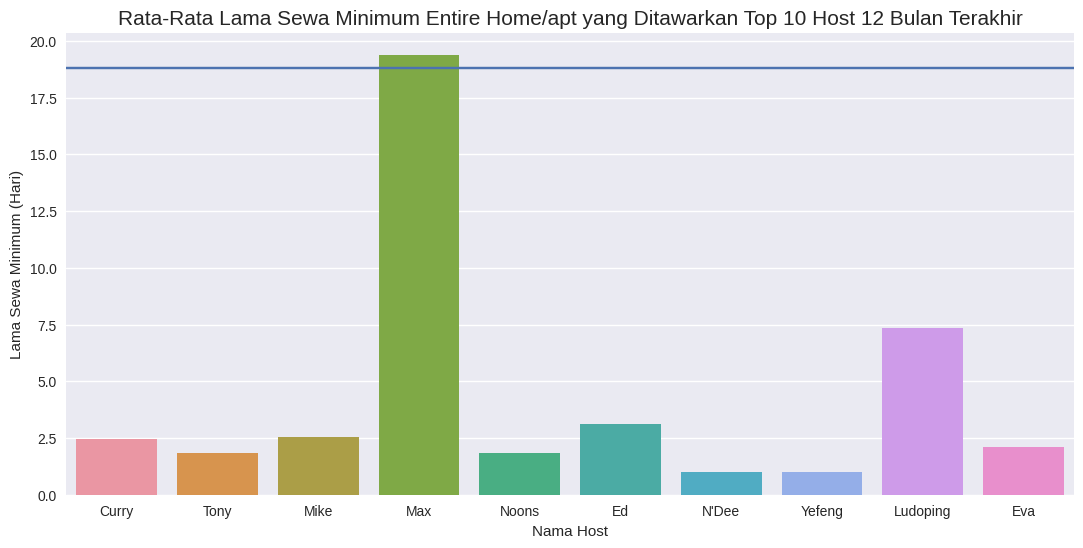

In [94]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostmn1[top_10_hostmn1['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'minimum_nights')
graph.axhline(rata2)
plt.title('Rata-Rata Lama Sewa Minimum Entire Home/apt yang Ditawarkan Top 10 Host 12 Bulan Terakhir', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Lama Sewa Minimum (Hari)')
plt.legend(loc = 2)
plt.show()

Walaupun lama sewa minimum tergolong kurang signifikan melalui uji korelasi, dari visualisasi barplot kita bisa melihat bahwa rata-rata lama sewa minimum tipe listing entire home/apt yang ditawarkan oleh top 10 host (baik secara keseluruhan maupun dalam 12 bulan terakhir) sebagian besar berada di bawah rata-rata lama sewa minimum listing entire home/apt di top 10 lokasi.

Dapat disimpulkan bahwa walaupun kurang signifikan, lama sewa minimum tetap menjadi pertimbangan guest dalam memilih listing.

## Berdasarkan Ketersediaan
Terakhir, mari kita analisis ketersediaan terhadap jumlah review.


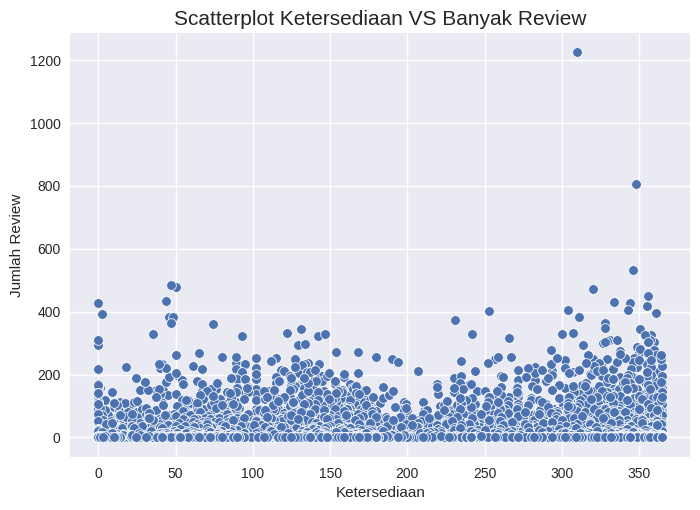

In [95]:
# Scatterplot hubungan ketersediaan dan jumlah review
sns.scatterplot(x = df['availability_365'], y = df['number_of_reviews'])
plt.title('Scatterplot Ketersediaan VS Banyak Review', size=15)
plt.xlabel('Ketersediaan')
plt.ylabel('Jumlah Review')
plt.show()

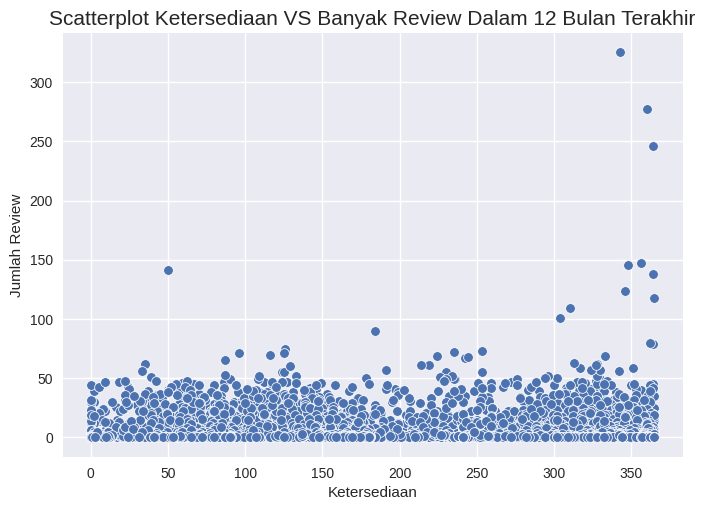

In [96]:
# Scatterplot hubungan ketersediaan dan jumlah review dalam 12 bulan terakhir
sns.scatterplot(x = df['availability_365'], y = df['number_of_reviews_ltm'])
plt.title('Scatterplot Ketersediaan VS Banyak Review Dalam 12 Bulan Terakhir', size=15)
plt.xlabel('Ketersediaan')
plt.ylabel('Jumlah Review')
plt.show()

In [97]:
# Cek distribusi avaibility_365
from scipy.stats import normaltest
stats, pval=normaltest(df['availability_365'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [98]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['availability_365', 'number_of_reviews']].corr(method='spearman')

,availability_365,number_of_reviews
availability_365,1.000000,-0.264195
number_of_reviews,-0.264195,1.000000


In [99]:
# Karena tidak berdistribusi normal, korelasi menggunakan spearman
df[['availability_365', 'number_of_reviews_ltm']].corr(method='spearman')

,availability_365,number_of_reviews_ltm
availability_365,1.000000,-0.212985
number_of_reviews_ltm,-0.212985,1.000000


Dari scatterplot dan uji korelasi yang dilakukan, dapat diketahui bahwa ketersediaan memiliki korelasi lemah negatif terhadap popularitas. Semakin lama ketersediaan suatu listing x hari, semakin sedikit jumlah review yang didapatkan.

Hal tersebut diduga terjadi karena guest cenderung memilih listing yang sudah terkenal atau berada di daerah yang populer. Listing yang populer atau berada di daerah yang populer cenderung akan ramai dengan guest, sehingga mengakibatkan ketersediaan listing semakin sedikit (karena penuh dibooking guest). Sehingga, terbentuklah korelasi negatif antara ketersediaan dengan jumlah review. Perlu dicatat bahwa ketersediaan yang rendah tidak membuat listing lebih populer, sehingga ketersediaan sebaiknya tidak dijadikan karakteristik listing yang populer. Analisis tidak perlu dilanjutkan, di bawah hanya sekedar informasi

In [102]:
# Menampilkan rata-rata ketersediaan di top 10 lokasi
df_lokasi_av = df.groupby(['neighbourhood', 'room_type'])[['availability_365']].mean().reset_index()
df_lokasi_av.sort_values(by = ['availability_365'], ascending = True, inplace = True)
df_lokasi_av.set_index('neighbourhood', inplace = True)
top_10_lokav = df_lokasi_av.loc[lokasi].reset_index()
top_10_lokav.head()

,neighbourhood,room_type,availability_365
0,Khlong Toei,Shared room,189.533333
1,Khlong Toei,Hotel room,199.931507
2,Khlong Toei,Entire home/apt,217.740132
3,Khlong Toei,Private room,282.155419
4,Vadhana,Entire home/apt,205.161268


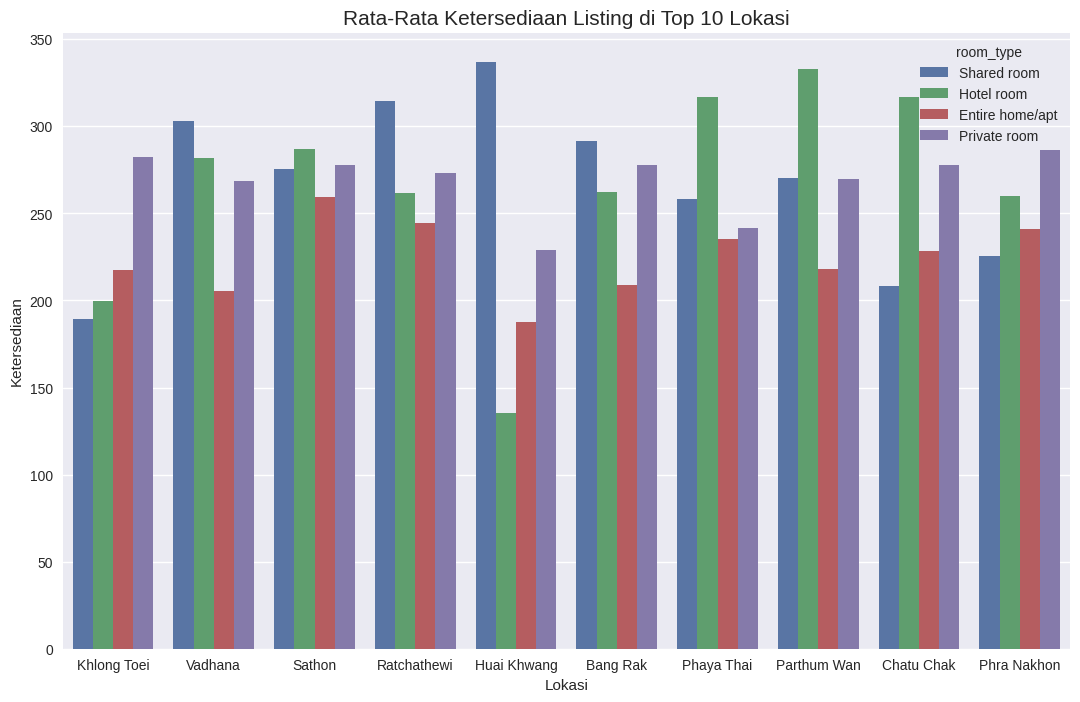

In [104]:
plt.figure(figsize=(13,8))
sns.barplot(data=top_10_lokav, x = 'neighbourhood', y = 'availability_365', hue = 'room_type')
plt.title('Rata-Rata Ketersediaan Listing di Top 10 Lokasi', size = 15)
plt.xlabel('Lokasi')
plt.ylabel('Ketersediaan')
plt.show()

In [105]:
# Rata-rata ketersediaan Entire home/apt di semua Top 10 lokasi
rata2 = top_10_lokav[top_10_lokav['room_type'] == 'Entire home/apt']['availability_365'].mean()
rata2

224.5920973418991

In [106]:
# Menampilkan ketersediaan top 10 host
df_host_av = df.groupby(['host_name', 'room_type'])[['availability_365']].mean().reset_index()
df_host_av.sort_values(by = ['availability_365'], ascending = True, inplace = True)
df_host_av.set_index('host_name', inplace = True)
top_10_hostav = df_host_av.loc[host].reset_index()
top_10_hostav.head()

,host_name,room_type,availability_365
0,Evan,Entire home/apt,338.216216
1,Tony,Entire home/apt,163.600000
2,Curry,Entire home/apt,259.478070
3,Themustang,Hotel room,38.200000
4,K,Entire home/apt,290.175676


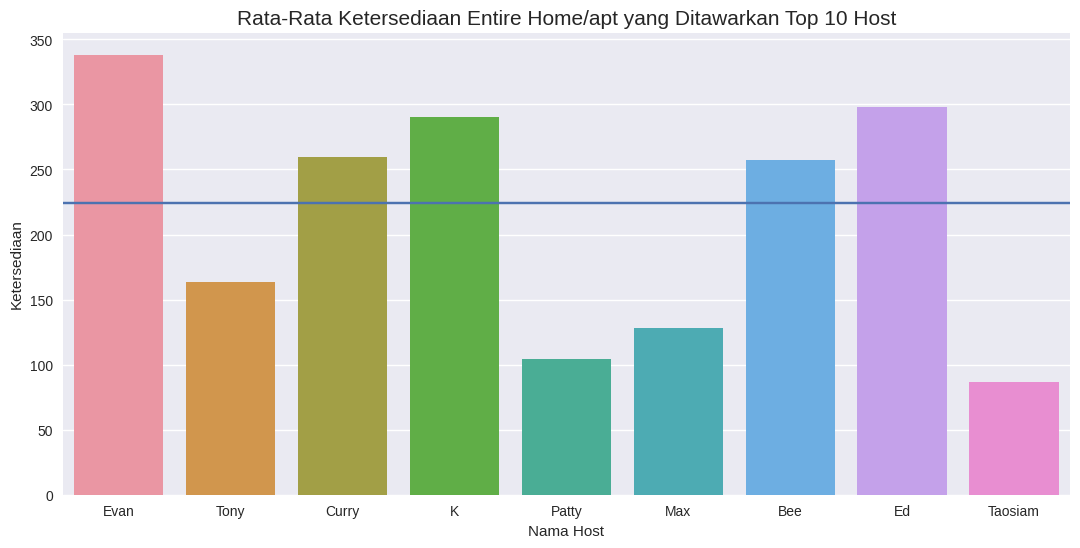

In [107]:
plt.figure(figsize=(13,6))
graph = sns.barplot(data=top_10_hostav[top_10_hostav['room_type'] == 'Entire home/apt'], x = 'host_name', y = 'availability_365')
graph.axhline(rata2)
plt.title('Rata-Rata Ketersediaan Entire Home/apt yang Ditawarkan Top 10 Host', size = 15)
plt.xlabel('Nama Host')
plt.ylabel('Ketersediaan')
plt.legend(loc = 2)
plt.show()

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat beberapa kesimpulan, antara lain:
* Lokasi memiliki peranan penting dalam popularitas listing.
* Host yang memiliki banyak listing cenderung populer, tetapi bukan menjadi satu-satunya faktor.
* Tipe listing juga memiliki peranan penting dalam popularitas listing
* Harga kurang mempengaruhi popularitas listing secara keseluruhan, tetapi tetap mempengaruhi preferensi guest.
* Lama sewa minimum kurang mempengaruhi popularitas listing, tetapi tetap mempengaruhi preferensi guest.
* Ketersediaan dapat memperlihatkan popularitas listing (korelasi negatif), tetapi tidak secara signifikan



Karakteristik listing yang populer dengan guest antara lain:

* Berada di lokasi yang memiliki destinasi wisata yang terkenal di Bangkok seperti market, pusat perbelanjaan, bangunan bersejarah, dan sebagainya.
* Bertipe Entire home/apt, dimana seluruh rumah/bangunan host disewakan pada guest.
* Memiliki harga di bawah rata-rata, tetapi bukan merupakan fokus utama guest (korelasi sangat rendah)
* Lama sewa minimum tidak terlalu lama sehingga fleksibel untuk guest, terutama yang gemar bepergian dan tidak tinggal di daerah yang sama dalam jangka waktu yang lama.
* Memiliki ketersediaan yang lebih terbatas (bukan ciri-ciri listing yang populer, tetapi akibat kepopuleran listing)

**Rekomendasi**
1. Utamakan listing yang berada di dekat lokasi wisata potensial. Lakukan riset tempat-tempat wisata di Bangkok yang banyak menarik wisatawan. Kemungkinan besar para wisatawan tersebut akan mencari tempat menginap menggunakan jasa aplikasi Airbnb.

2. Utamakan host yang memiliki banyak listing di daerah wisata Bangkok karena terbukti menghasilkan keuntungan yang besar. Dapat juga dibuat promosi bagi pemiliki properti di daerah wisata Bangkok untuk bergabung dengan Airbnb sehingga semakin banyak host yang mau membuka listing di daerah tersebut.

3. Utamakan tipe listing entire home/apt karena merupakan yang paling populer di kalangan guest, baik secara keseluruhan dan dalam 12 bulan terakhir (trend tidak berubah)

4. Utamakan harga listing yang terjangkau (kurang dari sama dengan rata-rata) sebagai daya tarik konsumen. Walaupun harga memiliki korelasi yang lemah terkait popularitas, tetapi listing teramai adalah yang memiliki harga di bawah rata-rata karena mampu mengundang traffic guest.

5. Kebijakan lama sewa minimum sebaiknya tidak terlalu lama, terutama untuk tipe listing entire home/apt, sehingga memberikan kemudahan dan fleksibilitas bagi guest.

6. Listing yang populer cenderung akan memiliki ketersediaan yang terbatas dalam beberapa hari kedepan (akibat ramai booking). Pastikan host memiliki rencana dalam mengelola ketersediaan listing (salah satunya lewat kebijakan jumlah minimum penyewaan, atau dapat juga menampung lebih dari 1 guest dalam waktu yang bersamaan), sehingga dapat menampung sebanyak mungkin guest.

Diharapkan analisis ini dapat memberikan informasi-informasi berharga pada pihak Airbnb sehingga dapat meningkatkan profit dalam jangka waktu ke depan, khususnya di daerah Bangkok, Thailand.

In [100]:
df.to_excel('airbnb.xlsx')